## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.colors import Normalize

## Test functions for optimization

In [2]:
def Rast(X,A):
    test = A*X.shape[0]+np.sum(np.square(X)-A*np.cos(2*np.pi*X),axis=0)
    #test = A+np.sum(np.square(X)-A*np.cos(2*np.pi*X),axis=0)/X.shape[0]
    return test    
    
def Sphere(X):
    return np.sum(np.square(X),axis=0)

def Rose2D(X):
    XX = X[0,:]
    YY = X[1,:]
    return (1-XX)**2 + 100*(YY-XX**2)**2
    
def Ackley(X):
    f = -20*np.exp(-0.2*np.sqrt(0.5*(X[0,:]**2+X[1,:]**2))) - np.exp(0.5*(np.cos(2*np.pi*X[0,:])+np.cos(2*np.pi*X[1,:]))) + np.e + 20 
    return f

def Himmel(Z):
    X = Z[0,:]
    Y = Z[1,:]
    f = (X**2+Y-11)**2+(X+Y**2-7)**2
    return f

## Ensemble Langevin dynamics based optimization on Rastrigin

### Testing GD and Langevin without noise

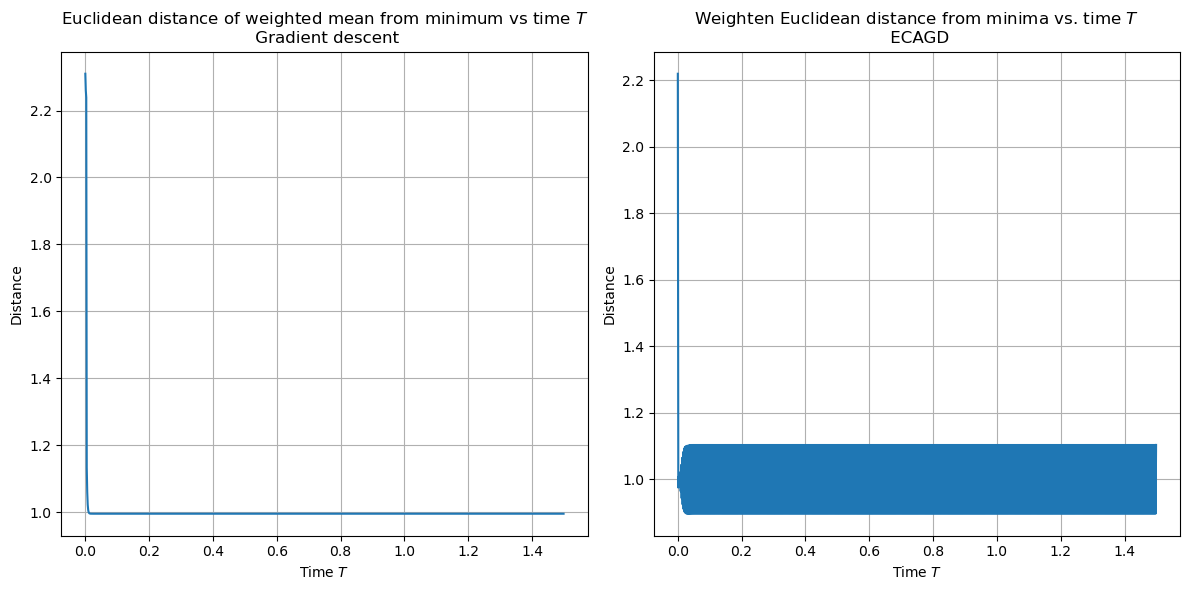

In [70]:
import numpy as np

#Initiate parameters
T = 10
h = 0.0015
ite = 1000
A = 10
d = 2
N = 15
lambdaa = 1
runs = 100
#Random bounded particles

dist_1 = np.zeros((1,ite))
dist_3 = np.zeros((1,ite))



results = np.zeros((2,4))
#alpha_array = np.array([1, 5, 10, 15])
for j in range(1):
    #alpha = alpha_array[j]
    count_1 = 0
    count_3 = 0
    for y in range(1):

        X = np.random.rand(d,N)
        lower_bound = -3
        upper_bound = 3
        X = lower_bound + (upper_bound - lower_bound) * X

        X_1 = X
        X_3 = X

        for x in range(ite):
            #beta = alpha

            #Gradient descent without noise
            gradf_1 = 2*X_1 + 2*A*np.pi*np.sin(2*np.pi*X_1)

            X_1 = X_1 - lambdaa*gradf_1*h #+ np.sqrt(2/beta)*C_sqrt@xi*h**(1/2)
            
            #Covariance without noise
            X_3_bar = 1/N*np.sum(X_3,axis=1)
            Q_3 = X_3-X_3_bar[:,np.newaxis]
            C_3 = 1/N*np.matmul(Q_3,Q_3.T)
            gradf_3 = 2*X_3 + 2*A*np.pi*np.sin(2*np.pi*X_3)

            X_3 = X_3 - lambdaa*C_3@gradf_3*h
            
            a_1 = np.sum(np.exp(-20*Rast(X_1,A)))
            b_1 = np.sum(X_1*np.exp(-20*Rast(X_1,A)),axis=1)
            c_1=b_1/a_1

            a_3 = np.sum(np.exp(-20*Rast(X_3,A)))
            b_3 = np.sum(X_3*np.exp(-20*Rast(X_3,A)),axis=1)
            c_3=b_3/a_3
            
            dist_1[0,x] = np.linalg.norm(c_1)
            dist_3[0,x] = np.linalg.norm(c_3)
            
        a_1 = np.sum(np.exp(-20*Rast(X_1,A)))
        b_1 = np.sum(X_1*np.exp(-20*Rast(X_1,A)),axis=1)
        c_1=b_1/a_1
      
        a_3 = np.sum(np.exp(-20*Rast(X_3,A)))
        b_3 = np.sum(X_3*np.exp(-20*Rast(X_3,A)),axis=1)
        c_3=b_3/a_3
        

        if np.linalg.norm(c_1)<0.1:
            count_1 +=1

        if np.linalg.norm(c_3)<0.1:
            count_3 +=1

    results[0,j] = count_1
    results[1,j] = count_3



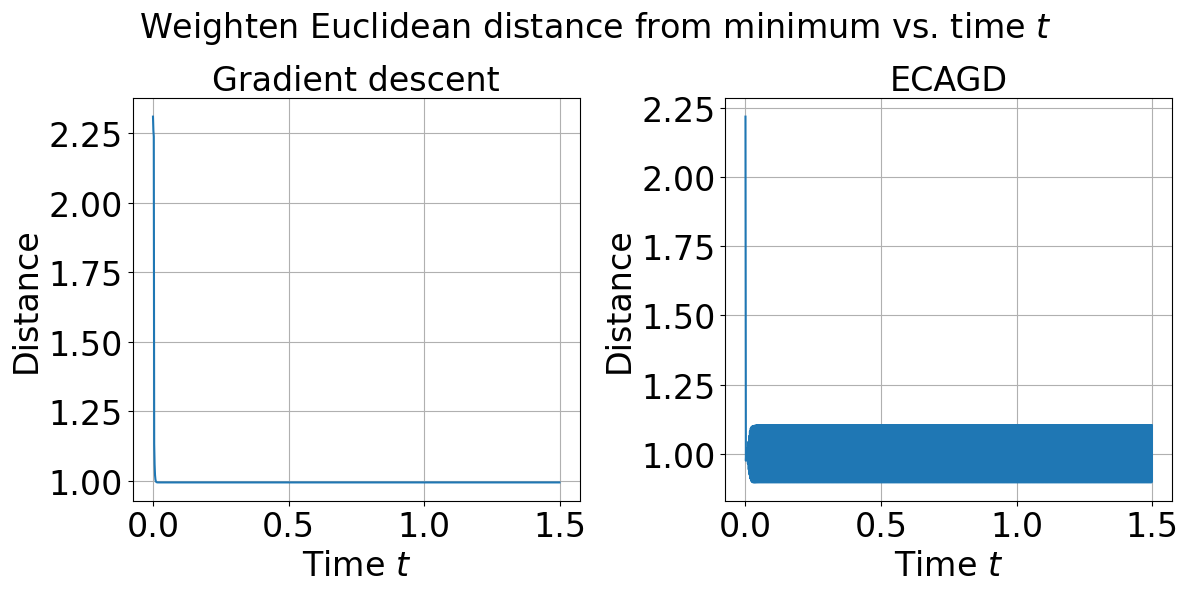

In [99]:
x_lin = np.zeros((1,1000))
for x in range(ite):
    x_lin[0,x] = x*0.0015

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
"""
plt.plot(x_lin[0,:],dist_1[0,:])
plt.title(r'Weighten Euclidean distance from minima vs. time')
plt.xlabel('Time')
plt.ylabel(r'Distance')
plt.grid(True)
plt.savefig('Dist_4.eps', format='eps')    
plt.show()
"""
axs[0].plot(x_lin[0,:], dist_1[0,:])
axs[0].set_title('Gradient descent',fontsize=24)
axs[0].set_xlabel(r'Time $t$',fontsize=24)
axs[0].set_ylabel(r'Distance',fontsize=24)
axs[0].tick_params(axis='x', labelsize=24)
axs[0].tick_params(axis='y', labelsize=24)
axs[0].grid(True)

# Plot for dist_2
axs[1].plot(x_lin[0,:], dist_3[0,:])
axs[1].set_title('ECAGD',fontsize=24)
axs[1].set_xlabel(r'Time $t$',fontsize=24)
axs[1].set_ylabel(r'Distance',fontsize=24)
axs[1].tick_params(axis='x', labelsize=24)
axs[1].tick_params(axis='y', labelsize=24)
axs[1].grid(True)

plt.suptitle('Weighten Euclidean distance from minimum vs. time $t$', fontsize=24)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('Dist_no_noise.eps', format='eps')
plt.show()

In [9]:
print(r"\begin{table}[]")
print(r"\begin{tabular}{l|llll}")
print(r"\backslashbox{Method}{$\alpha$-value}                                               & " + " & ".join([str(val) for val in alpha_array]) + r" \\ \hline")
for i, row in enumerate(results):
    method = ['Gradient descent &', 'Gradient descent with Brownian noise &', 'Ensemble Langevin dynamics &', 'Ensemble Langevin dynamics with Brownian noise &'][i]
    formatted_row = [f"{value/10:.1f}\%" for value in row]  # Convert each value to percentage
    print(f"{method:50}", end="")
    print(" & ".join(formatted_row), end=" \\\\\n")
print(r"\end{tabular}")
print(r"\end{table}")

\begin{table}[]
\begin{tabular}{l|llll}
\backslashbox{Method}{$\alpha$-value}                                               & 1 & 5 & 10 & 15 \\ \hline
Gradient descent &                                42.2\% & 0.0\% & 0.0\% & 0.0\% \\
Gradient descent with Brownian noise &            24.3\% & 0.0\% & 0.0\% & 0.0\% \\
\end{tabular}
\end{table}


### Testing GD, GD + noise, Langevin and Langevin + noise for different N

In [8]:
import numpy as np

#Initiate parameters
T = 1.5
h = 0.0015
ite = 1000
A = 10
d = 2
N = 20
lambdaa = 1
runs = 100
#Random bounded particles


#Particle position for visualization
box_1 = np.zeros((1,runs))
box_2 = np.zeros((1,runs))
box_3 = np.zeros((1,runs))
box_4 = np.zeros((1,runs))

box_5 = np.zeros((1,runs))
box_6 = np.zeros((1,runs))
box_7 = np.zeros((1,runs))
box_8 = np.zeros((1,runs))
"""
dist_1 = np.zeros((1,ite))
dist_2 = np.zeros((1,ite))
dist_3 = np.zeros((1,ite))
dist_4 = np.zeros((1,ite))
"""


X_save_1 = np.zeros((2,N*ite))
X_save_2 = np.zeros((2,N*ite))
X_save_3 = np.zeros((2,N*ite))
X_save_4 = np.zeros((2,N*ite))

results = np.zeros((4,4))
N_array = np.array([15, 10, 15, 20])
for j in range(1):
    N = N_array[j]
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    #while any(np.linalg.norm(X,axis=0)>0.1):
    for y in range(runs):

        X = np.random.rand(d,N)
        lower_bound = -3
        upper_bound = 3
        X = lower_bound + (upper_bound - lower_bound) * X

        X_1 = X
        X_2 = X
        X_3 = X
        X_4 = X
        for x in range(ite):
            beta = 0.015
            beta2 = 0.2
            if (x > 950):
                beta = 15400
                beta2 = 15400
                
            X_save_1[:,x*N:(x+1)*N] = X_1
            X_save_2[:,x*N:(x+1)*N] = X_2
            X_save_3[:,x*N:(x+1)*N] = X_3
            X_save_4[:,x*N:(x+1)*N] = X_4

            #Gradient descent without noise
            gradf_1 = 2*X_1 + 2*A*np.pi*np.sin(2*np.pi*X_1)

            X_1 = X_1 - lambdaa*gradf_1*h #+ np.sqrt(2/beta)*C_sqrt@xi*h**(1/2)

            #Gradient descent with noise
            gradf_2 = 2*X_2 + 2*A*np.pi*np.sin(2*np.pi*X_2)
            xi_2 = np.random.normal(0,1,(d,N))

            X_2 = X_2 - lambdaa*gradf_2*h + np.sqrt(2/beta2)*xi_2*h**(1/2)

            #Covariance without noise
            X_3_bar = 1/N*np.sum(X_3,axis=1)
            Q_3 = X_3-X_3_bar[:,np.newaxis]
            C_3 = 1/N*np.matmul(Q_3,Q_3.T)
            gradf_3 = 2*X_3 + 2*A*np.pi*np.sin(2*np.pi*X_3)

            X_3 = X_3 - lambdaa*C_3@gradf_3*h

            #Covariance with noise
            X_4_bar = 1/N*np.sum(X_4,axis=1)
            Q_4 = X_4-X_4_bar[:,np.newaxis]
            C_4 = 1/N*np.matmul(Q_4,Q_4.T)
            C_4_sqrt = 1/np.sqrt(N)*Q_4
            gradf_4 = 2*X_4 + 2*A*np.pi*np.sin(2*np.pi*X_4)
            xi_4 = np.random.normal(0,1,(N,N))
            xi_4 = np.random.normal(0,1,(d,N))

            X_4 = X_4 - lambdaa*C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt*xi_4*h**(1/2)

            #X_save[:,x*N:(x+1)*N] = X
            
            
            
            """
            a_1 = np.sum(np.exp(-20*Rast(X_1,A)))
            b_1 = np.sum(X_1*np.exp(-20*Rast(X_1,A)),axis=1)
            c_1=b_1/a_1
            
            a_2 = np.sum(np.exp(-20*Rast(X_2,A)))
            b_2 = np.sum(X_2*np.exp(-20*Rast(X_2,A)),axis=1)
            c_2=b_2/a_2

            a_3 = np.sum(np.exp(-20*Rast(X_3,A)))
            b_3 = np.sum(X_3*np.exp(-20*Rast(X_3,A)),axis=1)
            c_3=b_3/a_3

            a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
            b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
            c_4=b_4/a_4
            
            dist_1[0,x] = np.linalg.norm(c_1)
            dist_2[0,x] = np.linalg.norm(c_2)
            dist_3[0,x] = np.linalg.norm(c_3)
            dist_4[0,x] = np.linalg.norm(c_4)
            """
            
        a_1 = np.sum(np.exp(-20*Rast(X_1,A)))
        b_1 = np.sum(X_1*np.exp(-20*Rast(X_1,A)),axis=1)
        c_1=b_1/a_1
        
        a_2 = np.sum(np.exp(-20*Rast(X_2,A)))
        b_2 = np.sum(X_2*np.exp(-20*Rast(X_2,A)),axis=1)
        c_2=b_2/a_2
        
        a_3 = np.sum(np.exp(-20*Rast(X_3,A)))
        b_3 = np.sum(X_3*np.exp(-20*Rast(X_3,A)),axis=1)
        c_3=b_3/a_3
        
        a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
        b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
        c_4=b_4/a_4
        
        if j == 0:
            box_1[0,y] = np.linalg.norm(c_1)
            box_2[0,y] = np.linalg.norm(c_2)
            box_3[0,y] = np.linalg.norm(c_3)
            box_4[0,y] = np.linalg.norm(c_4)
        else:
            box_5[0,y] = np.linalg.norm(c_1)
            box_6[0,y] = np.linalg.norm(c_2)
            box_7[0,y] = np.linalg.norm(c_3)
            box_8[0,y] = np.linalg.norm(c_4)
        
        
        if np.linalg.norm(c_1)<0.1:
            count_1 +=1

        if np.linalg.norm(c_2)<0.1:
            count_2 +=1

        if np.linalg.norm(c_3)<0.1:
            count_3 +=1

        if np.linalg.norm(c_4)<0.1:
            count_4 +=1
    results[0,j] = count_1
    results[1,j] = count_2
    results[2,j] = count_3
    results[3,j] = count_4
results

array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


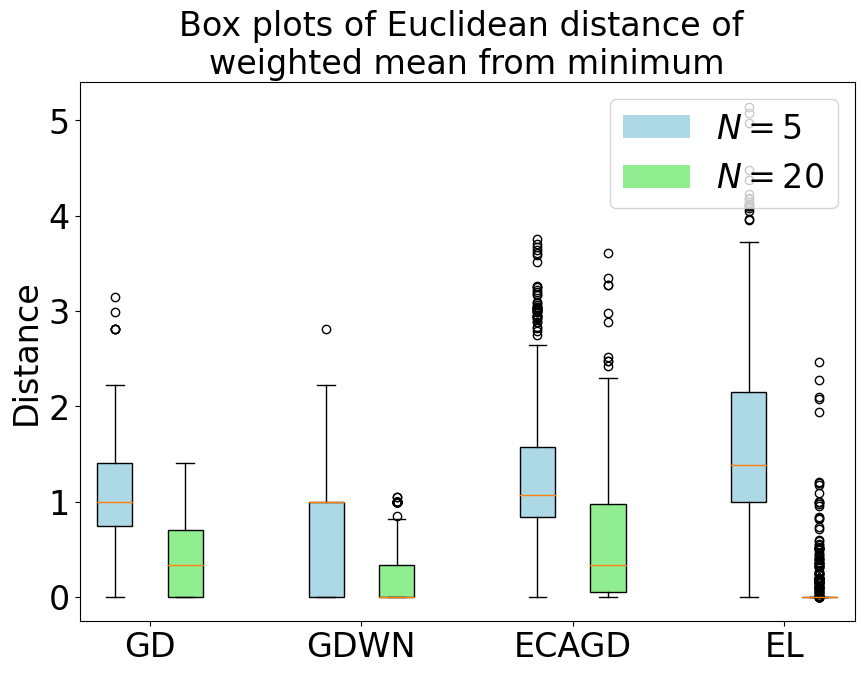

In [55]:
import matplotlib.pyplot as plt
import numpy as np
  
fig = plt.figure(figsize =(10, 7))

# Creating plot
box = plt.boxplot([ box_1[0,:],box_5[0,:],box_2[0,:],box_6[0,:],box_3[0,:],box_7[0,:], box_4[np.isnan(box_4)==0],box_8[0,:]], positions=[1, 2 ,4,5 ,7,8,10,11],patch_artist=True)
# show plot

colors = ['lightblue', 'lightgreen']  # Colors for the two sets of box plots

# Assigning colors to each box plot
for i in range(0, len(box['boxes']), 2):
    box['boxes'][i].set_facecolor(colors[0])
    box['boxes'][i + 1].set_facecolor(colors[1])

# Create custom legend
legend_labels = [r'$N=5$', r'$N=20$']
legend_patches = [plt.Rectangle((0,0),1,1,fc=color) for color in colors]
plt.legend(legend_patches, legend_labels, loc='upper right', fontsize=24)




plt.xticks([1.5, 4.5, 7.5,10.5 ], [ 'GD','GDWN','ECAGD', 'EL'],fontsize=24)
plt.yticks(fontsize =24)
plt.title('Box plots of Euclidean distance of \nweighted mean from minimum',fontsize=24)
plt.ylabel(r'Distance',fontsize=24)
plt.savefig('Box_Plot_N.eps', format='eps') 
plt.show()

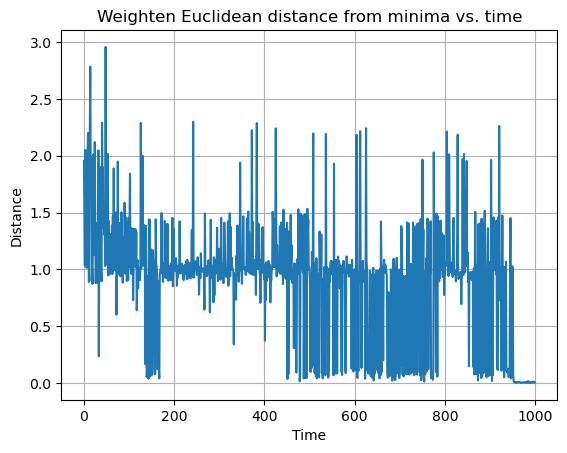

In [111]:
x_lin = np.zeros((1,1000))
for x in range(ite):
    x_lin[0,x] = x

# Plot
plt.plot(x_lin[0,:],dist_4[0,:])
plt.title(r'Weighten Euclidean distance from minima vs. time')
plt.xlabel('Time')
plt.ylabel(r'Distance')
plt.grid(True)
plt.savefig('Dist_4.eps', format='eps')    
plt.show()

In [41]:
print(r"\begin{table}[]")
print(r"\begin{tabular}{l|llll}")
print(r"\backslashbox{Method}{Number of particles}                                               & " + " & ".join([str(val) for val in N_array]) + r" \\ \hline")
for i, row in enumerate(results):
    method = ['Gradient descent &', 'Gradient descent with Brownian noise &', 'Ensemble Langevin dynamics &', 'Ensemble Langevin dynamics with Brownian noise &'][i]
    formatted_row = [f"{value/10:.2f}" for value in row]  # Format each value with 2 decimal places
    print(f"{method:50}", end="")
    print(" & ".join(formatted_row), end=" \\\\\n")
print(r"\end{tabular}")
print(r"\end{table}")

\begin{table}[]
\begin{tabular}{l|llll}
\backslashbox{Method}{Number of particles}                                               & 5 & 10 & 15 & 20 \\ \hline
Gradient descent &                                17.80 & 30.40 & 41.50 & 47.90 \\
Gradient descent with Brownian noise &            30.90 & 47.40 & 59.50 & 68.10 \\
Ensemble Langevin dynamics &                      12.50 & 18.10 & 25.20 & 27.90 \\
Ensemble Langevin dynamics with Brownian noise &  8.60 & 47.20 & 82.90 & 90.90 \\
\end{tabular}
\end{table}


### Testing GD, GD + noise, Langevin and Langevin + noise for different $\beta$ Constant different values without cut-off

In [119]:
import numpy as np

#Initiate parameters
T = 1.5
h = 0.0015
ite = 1000
A = 10
d = 2
N = 15
lambdaa = 1
runs = 1000
#Random bounded particles

results = np.zeros((2,6))
alpha_array = np.array([0.005, 0.01, 0.05, 1,5,25])
for j in range(6):
    alpha = alpha_array[j]
    count_2 = 0
    count_4 = 0
    for y in range(runs):

        X = np.random.rand(d,N)
        lower_bound = -3
        upper_bound = 3
        X = lower_bound + (upper_bound - lower_bound) * X

        X_2 = X
        X_4 = X
        for x in range(ite):
            beta = alpha

            
            #Gradient descent with noise
            gradf_2 = 2*X_2 + 2*A*np.pi*np.sin(2*np.pi*X_2)
            xi_2 = np.random.normal(0,1,(d,N))

            X_2 = X_2 - lambdaa*gradf_2*h + np.sqrt(2/beta)*xi_2*h**(1/2)


            #Covariance with noise
            X_4_bar = 1/N*np.sum(X_4,axis=1)
            Q_4 = X_4-X_4_bar[:,np.newaxis]
            C_4 = 1/N*np.matmul(Q_4,Q_4.T)
            C_4_sqrt = 1/np.sqrt(N)*Q_4
            gradf_4 = 2*X_4 + 2*A*np.pi*np.sin(2*np.pi*X_4)
            xi_4 = np.random.normal(0,1,(N,N))
            xi_4 = np.random.normal(0,1,(d,N))
            

            X_4 = X_4 - lambdaa*C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt*xi_4*h**(1/2)

            
        
        a_2 = np.sum(np.exp(-20*Rast(X_2,A)))
        b_2 = np.sum(X_2*np.exp(-20*Rast(X_2,A)),axis=1)
        c_2=b_2/a_2

        a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
        b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
        c_4=b_4/a_4
        
    
        if np.linalg.norm(c_2)<0.1:
            count_2 +=1

        if np.linalg.norm(c_4)<0.1:
            count_4 +=1
    
    results[0,j] = count_2
    results[1,j] = count_4
results

C:\Users\gveva\AppData\Local\Temp\ipykernel_9060\2814042845.py:56: RuntimeWarning: invalid value encountered in divide
  c_2=b_2/a_2
C:\Users\gveva\AppData\Local\Temp\ipykernel_9060\2814042845.py:43: RuntimeWarning: overflow encountered in matmul
  C_4 = 1/N*np.matmul(Q_4,Q_4.T)
C:\Users\gveva\AppData\Local\Temp\ipykernel_9060\2814042845.py:50: RuntimeWarning: invalid value encountered in matmul
  X_4 = X_4 - lambdaa*C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt*xi_4*h**(1/2)
C:\Users\gveva\AppData\Local\Temp\ipykernel_9060\2814042845.py:45: RuntimeWarning: invalid value encountered in sin
  gradf_4 = 2*X_4 + 2*A*np.pi*np.sin(2*np.pi*X_4)
C:\Users\gveva\AppData\Local\Temp\ipykernel_9060\2814042845.py:50: RuntimeWarning: overflow encountered in matmul
  X_4 = X_4 - lambdaa*C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt*xi_4*h**(1/2)


array([[  1.,   1.,  12., 267., 333., 364.],
       [301., 505., 362., 194., 207., 203.]])

In [120]:
print(r"\begin{table}[]")
print(r"\begin{tabular}{l|llll}")
print(r"\backslashbox{Method}{$\beta$}                                               & " + " & ".join([str(val) for val in alpha_array]) + r" \\ \hline")
for i, row in enumerate(results):
    method = ['Gradient descent with noise &', 'ECAGD with noise &', 'Ensemble Langevin dynamics &', 'Ensemble Langevin dynamics with Brownian noise &'][i]
    formatted_row = [f"{value/10:.1f}\%" for value in row]  # Convert each value to percentage
    print(f"{method:50}", end="")
    print(" & ".join(formatted_row), end=" \\\\\n")
print(r"\end{tabular}")
print(r"\end{table}")

\begin{table}[]
\begin{tabular}{l|llll}
\backslashbox{Method}{$\beta$}                                               & 0.005 & 0.01 & 0.05 & 1.0 & 5.0 & 25.0 \\ \hline
Gradient descent with noise &                     0.1\% & 0.1\% & 1.2\% & 26.7\% & 33.3\% & 36.4\% \\
ECAGD with noise &                                30.1\% & 50.5\% & 36.2\% & 19.4\% & 20.7\% & 20.3\% \\
\end{tabular}
\end{table}


### Testing GD, GD + noise, Langevin and Langevin + noise for different $\beta$ Constant different values with cut-off

In [19]:
import numpy as np

#Initiate parameters
T = 10
h = 0.0015
ite = 1000
A = 10
d = 2
N = 15
lambdaa = 1
runs = 1000
#Random bounded particles

dist_2 = np.zeros((1,ite))
dist_4 = np.zeros((1,ite))

box_2 = np.zeros((1,runs))
box_4 = np.zeros((1,runs))


results = np.zeros((2,6))
alpha_array = np.array([1, 2, 3, 5])
alpha_array = np.array([0.01, 0.015,0.025,25,100])
alpha_array = np.array([0.05,0.1,0.2,0.3,0.4])
for j in range(1):
    alpha = alpha_array[j]
    #alpha = 0.015
    count_2 = 0
    count_4 = 0
    for y in range(runs):
        X = np.random.rand(d,N)
        lower_bound = -3
        upper_bound = 3
        X = lower_bound + (upper_bound - lower_bound) * X

        X_2 = X
        X_4 = X
        for x in range(ite):
            beta = 0.015 # alpha
            beta2 = 0.2 # 
            if (x > 950):
                beta = 1540
                beta2 = 1540


            #Gradient descent with noise
            gradf_2 = 2*X_2 + 2*A*np.pi*np.sin(2*np.pi*X_2)
            xi_2 = np.random.normal(0,1,(d,N))

            X_2 = X_2 - lambdaa*gradf_2*h + np.sqrt(2/beta2)*xi_2*h**(1/2)

            #Covariance with noise
            X_4_bar = 1/N*np.sum(X_4,axis=1)
            Q_4 = X_4-X_4_bar[:,np.newaxis]
            C_4 = 1/N*np.matmul(Q_4,Q_4.T)
            C_4_sqrt = 1/np.sqrt(N)*Q_4
            gradf_4 = 2*X_4 + 2*A*np.pi*np.sin(2*np.pi*X_4)
            xi_4 = np.random.normal(0,1,(N,N))
            xi_4 = np.random.normal(0,1,(d,N))

            X_4 = X_4 - lambdaa*C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt*xi_4*h**(1/2)
            
            a_2 = np.sum(np.exp(-20*Rast(X_2,A)))
            b_2 = np.sum(X_2*np.exp(-20*Rast(X_2,A)),axis=1)
            c_2=b_2/a_2

            a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
            b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
            c_4=b_4/a_4
            
            dist_2[0,x] = np.linalg.norm(c_2)
            dist_4[0,x] = np.linalg.norm(c_4)
            
        a_2 = np.sum(np.exp(-20*Rast(X_2,A)))
        b_2 = np.sum(X_2*np.exp(-20*Rast(X_2,A)),axis=1)
        c_2=b_2/a_2
        
        a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
        b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
        c_4=b_4/a_4
        
        
        box_2[0,y] = np.linalg.norm(c_2)
        box_4[0,y] = np.linalg.norm(c_4)
        
    
        if np.linalg.norm(c_2)<0.1:
            count_2 +=1

        if np.linalg.norm(c_4)<0.1:
            count_4 +=1

    results[0,j] = count_2

    results[1,j] = count_4
results

array([[608.,   0.,   0.,   0.,   0.,   0.],
       [829.,   0.,   0.,   0.,   0.,   0.]])

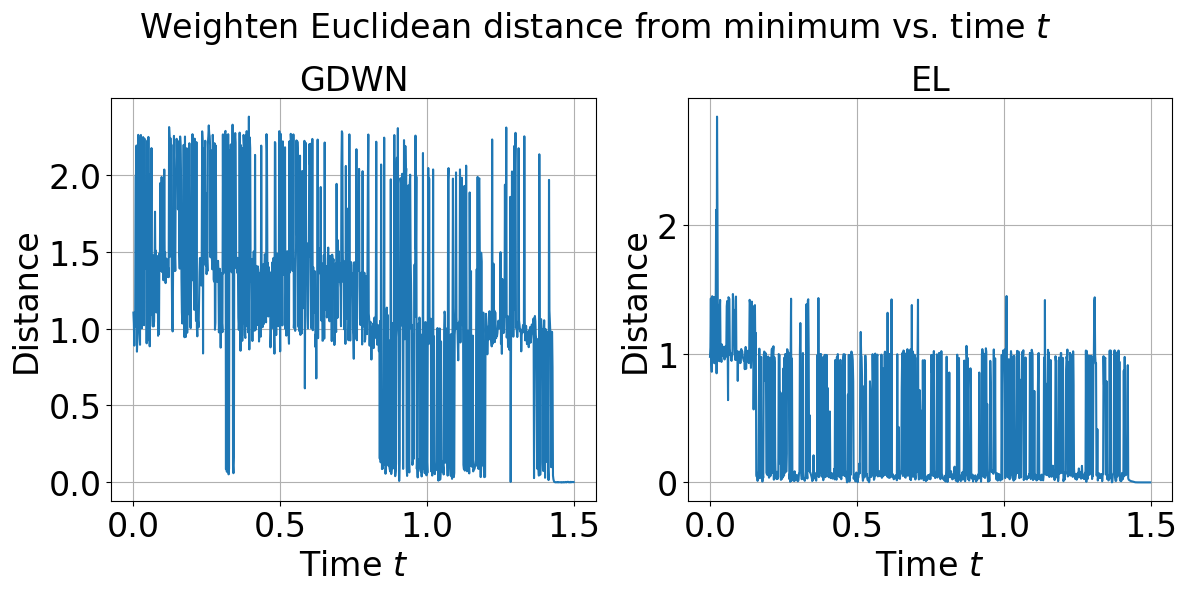

In [25]:
x_lin = np.zeros((1,1000))
for x in range(ite):
    x_lin[0,x] = x*0.0015

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
"""
plt.plot(x_lin[0,:],dist_1[0,:])
plt.title(r'Weighten Euclidean distance from minima vs. time')
plt.xlabel('Time')
plt.ylabel(r'Distance')
plt.grid(True)
plt.savefig('Dist_4.eps', format='eps')    
plt.show()
"""
axs[0].plot(x_lin[0,:], dist_2[0,:])
axs[0].set_title('GDWN',fontsize=24)
axs[0].set_xlabel(r'Time $t$',fontsize=24)
axs[0].set_ylabel(r'Distance',fontsize=24)
axs[0].tick_params(axis='x', labelsize=24)
axs[0].tick_params(axis='y', labelsize=24)
axs[0].grid(True)

# Plot for dist_2
axs[1].plot(x_lin[0,:], dist_4[0,:])
axs[1].set_title('EL',fontsize=24)
axs[1].set_xlabel(r'Time $t$',fontsize=24)
axs[1].set_ylabel(r'Distance',fontsize=24)
axs[1].tick_params(axis='x', labelsize=24)
axs[1].tick_params(axis='y', labelsize=24)
axs[1].grid(True)

plt.suptitle('Weighten Euclidean distance from minimum vs. time $t$', fontsize=24)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('Dist_noise_cutoff.eps', format='eps')
plt.show()

Total number of outliers: 23


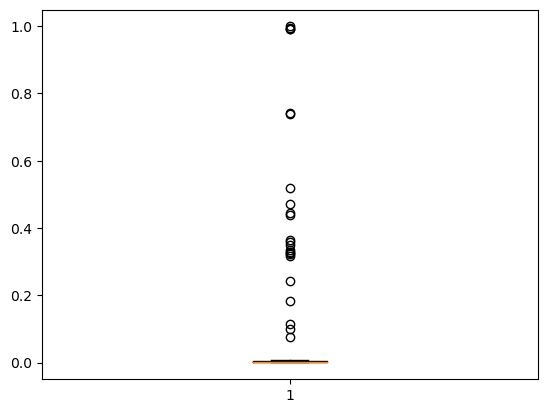

In [5]:
boxplot_data = [ box_4[0,:]]
boxplot_stats = plt.boxplot(boxplot_data, positions=[1])
outliers_count = 0
for stats in boxplot_stats['fliers']:
    outliers_count += len(stats.get_ydata())

print("Total number of outliers:", outliers_count)

In [18]:
np.sum(box_2 > 0.1,axis=1)
np.sum(box_4 > 0.1,axis=1)

array([18])

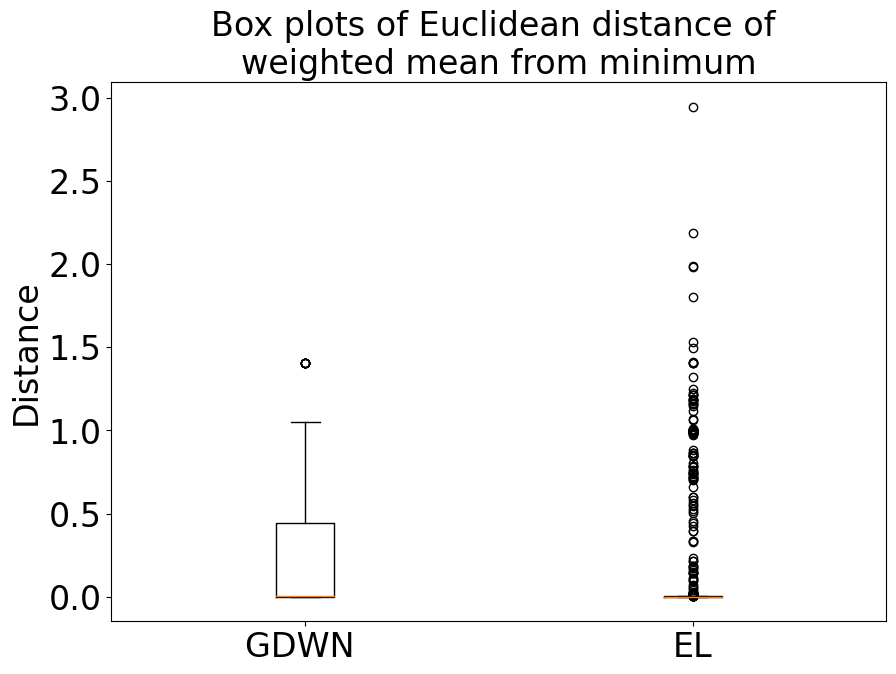

In [23]:
import matplotlib.pyplot as plt
import numpy as np
  
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot([ box_2[0,:], box_4[0,:]], positions=[1, 2])
#plt.boxplot([ box_2[box_2 > 0.1], box_4[box_4 > 0.1]], positions=[1, 2])
# show plot
plt.xticks([1, 2, ], [ 'GDWN ', 'EL'],fontsize=24)
plt.yticks(fontsize =24)
plt.title('Box plots of Euclidean distance of \nweighted mean from minimum',fontsize=24)
plt.ylabel(r'Distance',fontsize=24)
plt.savefig('Box_Plot_b.eps', format='eps') 
plt.show()

In [127]:
print(r"\begin{table}[]")
print(r"\begin{tabular}{l|llll}")
print(r"\backslashbox{Method}{$\beta$}                                               & " + " & ".join([str(val) for val in alpha_array]) + r" \\ \hline")
for i, row in enumerate(results):
    method = ['Gradient descent with noise &', 'Ensemble Langevin &', 'Ensemble Langevin dynamics &', 'Ensemble Langevin dynamics with Brownian noise &'][i]
    formatted_row = [f"{value/10:.1f}\%" for value in row]  # Convert each value to percentage
    print(f"{method:50}", end="")
    print(" & ".join(formatted_row), end=" \\\\\n")
print(r"\end{tabular}")
print(r"\end{table}")

\begin{table}[]
\begin{tabular}{l|llll}
\backslashbox{Method}{$\beta$}                                               & 0.01 & 0.015 & 0.025 & 25.0 & 100.0 \\ \hline
Gradient descent with noise &                     6.6\% & 11.1\% & 14.2\% & 42.3\% & 36.8\% & 0.0\% \\
Ensemble Langevin &                               64.6\% & 84.1\% & 78.2\% & 22.0\% & 18.3\% & 0.0\% \\
\end{tabular}
\end{table}


### Testing GD, GD + noise, Langevin and Langevin + noise for different $\beta$ Constant + cut-off

In [9]:
import numpy as np

#Initiate parameters
T = 10
h = 0.01
ite = 1000
A = 10
d = 2
N = 15
lambdaa = 0.1
runs = 100
#Random bounded particles


#Particle position for visualization
X_save_1 = np.zeros((2,N*ite))
X_save_2 = np.zeros((2,N*ite))
X_save_3 = np.zeros((2,N*ite))
X_save_4 = np.zeros((2,N*ite))

results = np.zeros((4,4))
alpha_array = np.array([200, 300, 400, 500])
for j in range(4):
    alpha = alpha_array[j]
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    #while any(np.linalg.norm(X,axis=0)>0.1):
    for y in range(runs):

        X = np.random.rand(d,N)
        lower_bound = -3
        upper_bound = 3
        X = lower_bound + (upper_bound - lower_bound) * X

        X_1 = X
        X_2 = X
        X_3 = X
        X_4 = X
        for x in range(ite):
            beta = 2
            if (x > alpha):
                beta = 1000

            #Gradient descent without noise
            gradf_1 = 2*X_1 + 2*A*np.pi*np.sin(2*np.pi*X_1)

            X_1 = X_1 - lambdaa*gradf_1*h #+ np.sqrt(2/beta)*C_sqrt@xi*h**(1/2)

            #Gradient descent with noise
            gradf_2 = 2*X_2 + 2*A*np.pi*np.sin(2*np.pi*X_2)
            xi_2 = np.random.normal(0,1,(d,N))

            X_2 = X_2 - lambdaa*gradf_2*h + np.sqrt(2/beta)*xi_2*h**(1/2)

            #Covariance without noise
            X_3_bar = 1/N*np.sum(X_3,axis=1)
            Q_3 = X_3-X_3_bar[:,np.newaxis]
            C_3 = 1/N*np.matmul(Q_3,Q_3.T)
            gradf_3 = 2*X_3 + 2*A*np.pi*np.sin(2*np.pi*X_3)

            X_3 = X_3 - lambdaa*C_3@gradf_3*h

            #Covariance with noise
            X_4_bar = 1/N*np.sum(X_4,axis=1)
            Q_4 = X_4-X_4_bar[:,np.newaxis]
            C_4 = 1/N*np.matmul(Q_4,Q_4.T)
            C_4_sqrt = 1/np.sqrt(N)*Q_4
            gradf_4 = 2*X_4 + 2*A*np.pi*np.sin(2*np.pi*X_4)
            xi_4 = np.random.normal(0,1,(N,N))
            #xi_4 = np.random.normal(0,1,(d,N))

            X_4 = X_4 - lambdaa*C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt@xi_4*h**(1/2)

            #X_save[:,x*N:(x+1)*N] = X
            X_save_1[:,x*N:(x+1)*N] = X_1
            X_save_2[:,x*N:(x+1)*N] = X_2
            X_save_3[:,x*N:(x+1)*N] = X_3
            X_save_4[:,x*N:(x+1)*N] = X_4
            
        a_1 = np.sum(np.exp(-20*Rast(X_1,A)))
        b_1 = np.sum(X_1*np.exp(-20*Rast(X_1,A)),axis=1)
        c_1=b_1/a_1
        
        a_2 = np.sum(np.exp(-20*Rast(X_2,A)))
        b_2 = np.sum(X_2*np.exp(-20*Rast(X_2,A)),axis=1)
        c_2=b_2/a_2
        
        a_3 = np.sum(np.exp(-20*Rast(X_3,A)))
        b_3 = np.sum(X_3*np.exp(-20*Rast(X_3,A)),axis=1)
        c_3=b_3/a_3
        
        a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
        b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
        c_4=b_4/a_4
        
    
        if np.linalg.norm(c_1)<0.1:
            count_1 +=1

        if np.linalg.norm(c_2)<0.1:
            count_2 +=1

        if np.linalg.norm(c_3)<0.1:
            count_3 +=1

        if np.linalg.norm(c_4)<0.1:
            count_4 +=1
    results[0,j] = count_1
    results[1,j] = count_2
    results[2,j] = count_3
    results[3,j] = count_4

In [10]:
results

array([[41., 50., 37., 41.],
       [40., 49., 51., 44.],
       [41., 51., 36., 40.],
       [60., 56., 67., 72.]])

In [50]:
print(r"\begin{table}[]")
print(r"\begin{tabular}{l|llll}")
print(r"\backslashbox{Method}{$\alpha$-value}                                               & " + " & ".join([str(val) for val in alpha_array]) + r" \\ \hline")
for i, row in enumerate(results):
    method = ['Gradient descent &', 'Gradient descent with Brownian noise &', 'Ensemble Langevin dynamics &', 'Ensemble Langevin dynamics with Brownian noise &'][i]
    formatted_row = [f"{value:.2f}" for value in row]  # Format each value with 2 decimal places
    print(f"{method:50}", end="")
    print(" & ".join(formatted_row), end=" \\\\\n")
print(r"\end{tabular}")
print(r"\end{table}")

\begin{table}[]
\begin{tabular}{l|llll}
\backslashbox{Method}{$\alpha$-value}                                               & 200 & 300 & 400 & 500 \\ \hline
Gradient descent &                                47.00 & 45.00 & 51.00 & 40.00 \\
Gradient descent with Brownian noise &            42.00 & 47.00 & 42.00 & 47.00 \\
Ensemble Langevin dynamics &                      50.00 & 44.00 & 49.00 & 45.00 \\
Ensemble Langevin dynamics with Brownian noise &  55.00 & 59.00 & 63.00 & 70.00 \\
\end{tabular}
\end{table}


### Testing GD, GD + noise, Langevin and Langevin + noise for different $\beta$ Linear

In [65]:
import numpy as np

#Initiate parameters
T = 10
h = 0.01
ite = 1000
A = 10
d = 2
N = 15
lambdaa = 0.1
runs = 100
#Random bounded particles


#Particle position for visualization
X_save_1 = np.zeros((2,N*ite))
X_save_2 = np.zeros((2,N*ite))
X_save_3 = np.zeros((2,N*ite))
X_save_4 = np.zeros((2,N*ite))

results = np.zeros((4,4))
alpha_array = np.array([7, 8, 9, 10])
for j in range(4):
    alpha = alpha_array[j]
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    #while any(np.linalg.norm(X,axis=0)>0.1):
    for y in range(runs):

        X = np.random.rand(d,N)
        lower_bound = -3
        upper_bound = 3
        X = lower_bound + (upper_bound - lower_bound) * X

        X_1 = X
        X_2 = X
        X_3 = X
        X_4 = X
        for x in range(ite):
            beta = (1+h*(x+1))/alpha
            if (x > 950):
                beta = 1000

            #Gradient descent without noise
            gradf_1 = 2*X_1 + 2*A*np.pi*np.sin(2*np.pi*X_1)

            X_1 = X_1 - lambdaa*gradf_1*h #+ np.sqrt(2/beta)*C_sqrt@xi*h**(1/2)

            #Gradient descent with noise
            gradf_2 = 2*X_2 + 2*A*np.pi*np.sin(2*np.pi*X_2)
            xi_2 = np.random.normal(0,1,(d,N))

            X_2 = X_2 - lambdaa*gradf_2*h + np.sqrt(2/beta)*xi_2*h**(1/2)

            #Covariance without noise
            X_3_bar = 1/N*np.sum(X_3,axis=1)
            Q_3 = X_3-X_3_bar[:,np.newaxis]
            C_3 = 1/N*np.matmul(Q_3,Q_3.T)
            gradf_3 = 2*X_3 + 2*A*np.pi*np.sin(2*np.pi*X_3)

            X_3 = X_3 - lambdaa*C_3@gradf_3*h

            #Covariance with noise
            X_4_bar = 1/N*np.sum(X_4,axis=1)
            Q_4 = X_4-X_4_bar[:,np.newaxis]
            C_4 = 1/N*np.matmul(Q_4,Q_4.T)
            C_4_sqrt = 1/np.sqrt(N)*Q_4
            gradf_4 = 2*X_4 + 2*A*np.pi*np.sin(2*np.pi*X_4)
            xi_4 = np.random.normal(0,1,(N,N))
            #xi_4 = np.random.normal(0,1,(d,N))

            X_4 = X_4 - lambdaa*C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt@xi_4*h**(1/2)

            #X_save[:,x*N:(x+1)*N] = X
            X_save_1[:,x*N:(x+1)*N] = X_1
            X_save_2[:,x*N:(x+1)*N] = X_2
            X_save_3[:,x*N:(x+1)*N] = X_3
            X_save_4[:,x*N:(x+1)*N] = X_4
            
        a_1 = np.sum(np.exp(-20*Rast(X_1,A)))
        b_1 = np.sum(X_1*np.exp(-20*Rast(X_1,A)),axis=1)
        c_1=b_1/a_1
        
        a_2 = np.sum(np.exp(-20*Rast(X_2,A)))
        b_2 = np.sum(X_2*np.exp(-20*Rast(X_2,A)),axis=1)
        c_2=b_2/a_2
        
        a_3 = np.sum(np.exp(-20*Rast(X_3,A)))
        b_3 = np.sum(X_3*np.exp(-20*Rast(X_3,A)),axis=1)
        c_3=b_3/a_3
        
        a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
        b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
        c_4=b_4/a_4
        
    
        if np.linalg.norm(c_1)<0.1:
            count_1 +=1

        if np.linalg.norm(c_2)<0.1:
            count_2 +=1

        if np.linalg.norm(c_3)<0.1:
            count_3 +=1

        if np.linalg.norm(c_4)<0.1:
            count_4 +=1
    results[0,j] = count_1
    results[1,j] = count_2
    results[2,j] = count_3
    results[3,j] = count_4
    

C:\Users\gveva\AppData\Local\Temp\ipykernel_2160\3835878532.py:68: RuntimeWarning: overflow encountered in matmul
  C_4 = 1/N*np.matmul(Q_4,Q_4.T)
C:\Users\gveva\AppData\Local\Temp\ipykernel_2160\3835878532.py:74: RuntimeWarning: invalid value encountered in matmul
  X_4 = X_4 - lambdaa*C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt@xi_4*h**(1/2)
C:\Users\gveva\AppData\Local\Temp\ipykernel_2160\3835878532.py:70: RuntimeWarning: invalid value encountered in sin
  gradf_4 = 2*X_4 + 2*A*np.pi*np.sin(2*np.pi*X_4)
C:\Users\gveva\AppData\Local\Temp\ipykernel_2160\3835878532.py:74: RuntimeWarning: overflow encountered in matmul
  X_4 = X_4 - lambdaa*C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt@xi_4*h**(1/2)


In [66]:
print(r"\begin{table}[]")
print(r"\begin{tabular}{l|llll}")
print(r"\backslashbox{Method}{$\alpha$-value}                                               & " + " & ".join([str(val) for val in alpha_array]) + r" \\ \hline")
for i, row in enumerate(results):
    method = ['Gradient descent &', 'Gradient descent with Brownian noise &', 'Ensemble Langevin dynamics &', 'Ensemble Langevin dynamics with Brownian noise &'][i]
    formatted_row = [f"{value:.2f}" for value in row]  # Format each value with 2 decimal places
    print(f"{method:50}", end="")
    print(" & ".join(formatted_row), end=" \\\\\n")
print(r"\end{tabular}")
print(r"\end{table}")

\begin{table}[]
\begin{tabular}{l|llll}
\backslashbox{Method}{$\alpha$-value}                                               & 7 & 8 & 9 & 10 \\ \hline
Gradient descent &                                43.00 & 45.00 & 38.00 & 45.00 \\
Gradient descent with Brownian noise &            33.00 & 33.00 & 22.00 & 29.00 \\
Ensemble Langevin dynamics &                      42.00 & 44.00 & 38.00 & 42.00 \\
Ensemble Langevin dynamics with Brownian noise &  57.00 & 35.00 & 25.00 & 20.00 \\
\end{tabular}
\end{table}


### Testing GD, GD + noise, Langevin and Langevin + noise for different $\beta$. Non-linear

In [29]:
import numpy as np

#Initiate parameters
T = 10
h = 0.0015
ite = 1000
A = 10
d = 2
N = 15
lambdaa = 1
runs = 1000
#Random bounded particles
"""
dist_2 = np.zeros((1,ite))
dist_4 = np.zeros((1,ite))
"""
alpha = 950
results = np.zeros((2,6))
alpha_array = np.array([0,100,500, 800, 900, 950])
#alpha_array = np.array([0.01,0.015,0.02,0.03,0.05])
for j in range(6):
    alpha = alpha_array[j]
    count_2 = 0
    count_4 = 0
    #zeta = 1.5
    for y in range(runs):

        X = np.random.rand(d,N)
        lower_bound = -3
        upper_bound = 3
        X = lower_bound + (upper_bound - lower_bound) * X

        X_2 = X
        X_4 = X
        for x in range(ite):
            if x <= alpha:
                # Start with noise large in the beginning and decreases over time
                beta = 0.015
                beta2 = 0.2
            else:
                # Exponentially increase noise after 100 iterations
                beta = 15400/(ite-alpha)*(x-alpha) +0.015
                beta2 = 15400/(ite-alpha)*(x-alpha) +0.2


            #Gradient descent with noise
            gradf_2 = 2*X_2 + 2*A*np.pi*np.sin(2*np.pi*X_2)
            xi_2 = np.random.normal(0,1,(d,N))

            X_2 = X_2 - lambdaa*gradf_2*h + np.sqrt(2/beta2)*xi_2*h**(1/2)


            #Covariance with noise
            X_4_bar = 1/N*np.sum(X_4,axis=1)
            Q_4 = X_4-X_4_bar[:,np.newaxis]
            C_4 = 1/N*np.matmul(Q_4,Q_4.T)
            C_4_sqrt = 1/np.sqrt(N)*Q_4
            gradf_4 = 2*X_4 + 2*A*np.pi*np.sin(2*np.pi*X_4)
            xi_4 = np.random.normal(0,1,(N,N))
            xi_4 = np.random.normal(0,1,(d,N))

            X_4 = X_4 - lambdaa*C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt*xi_4*h**(1/2)
            """
            a_2 = np.sum(np.exp(-20*Rast(X_2,A)))
            b_2 = np.sum(X_2*np.exp(-20*Rast(X_2,A)),axis=1)
            c_2=b_2/a_2

            a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
            b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
            c_4=b_4/a_4
            
            dist_2[0,x] = np.linalg.norm(c_2)
            dist_4[0,x] = np.linalg.norm(c_4)
            """

        
        a_2 = np.sum(np.exp(-20*Rast(X_2,A)))
        b_2 = np.sum(X_2*np.exp(-20*Rast(X_2,A)),axis=1)
        c_2=b_2/a_2
        
        
        a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
        b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
        c_4=b_4/a_4
        
    

        if np.linalg.norm(c_2)<0.1:
            count_2 +=1

        if np.linalg.norm(c_4)<0.1:
            count_4 +=1

    results[0,j] = count_2
    results[1,j] = count_4
results

C:\Users\gveva\AppData\Local\Temp\ipykernel_13324\1042784099.py:56: RuntimeWarning: overflow encountered in matmul
  C_4 = 1/N*np.matmul(Q_4,Q_4.T)
C:\Users\gveva\AppData\Local\Temp\ipykernel_13324\1042784099.py:62: RuntimeWarning: invalid value encountered in matmul
  X_4 = X_4 - lambdaa*C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt*xi_4*h**(1/2)
C:\Users\gveva\AppData\Local\Temp\ipykernel_13324\1042784099.py:58: RuntimeWarning: invalid value encountered in sin
  gradf_4 = 2*X_4 + 2*A*np.pi*np.sin(2*np.pi*X_4)


array([[422., 437., 567., 589., 617., 626.],
       [227., 581., 841., 852., 815., 843.]])

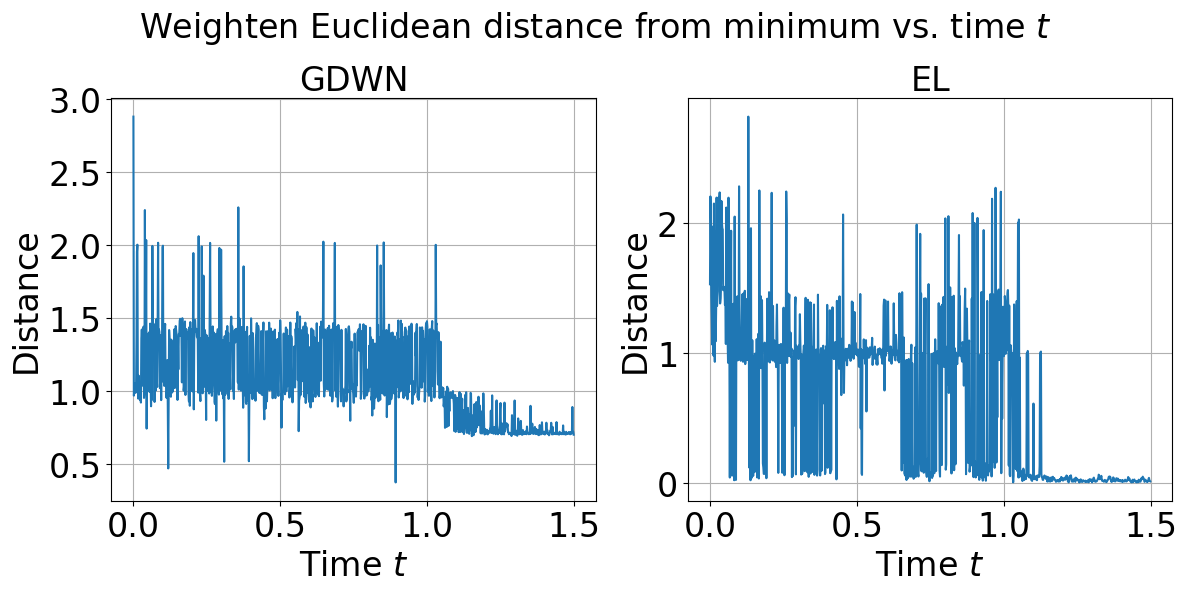

In [94]:
x_lin = np.zeros((1,1000))
for x in range(ite):
    x_lin[0,x] = x*0.0015

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
"""
plt.plot(x_lin[0,:],dist_1[0,:])
plt.title(r'Weighten Euclidean distance from minima vs. time')
plt.xlabel('Time')
plt.ylabel(r'Distance')
plt.grid(True)
plt.savefig('Dist_4.eps', format='eps')    
plt.show()
"""
axs[0].plot(x_lin[0,:], dist_2[0,:])
axs[0].set_title('GDWN',fontsize=24)
axs[0].set_xlabel(r'Time $t$',fontsize=24)
axs[0].set_ylabel(r'Distance',fontsize=24)
axs[0].tick_params(axis='x', labelsize=24)
axs[0].tick_params(axis='y', labelsize=24)
axs[0].grid(True)

# Plot for dist_2
axs[1].plot(x_lin[0,:], dist_4[0,:])
axs[1].set_title('EL',fontsize=24)
axs[1].set_xlabel(r'Time $t$',fontsize=24)
axs[1].set_ylabel(r'Distance',fontsize=24)
axs[1].tick_params(axis='x', labelsize=24)
axs[1].tick_params(axis='y', labelsize=24)
axs[1].grid(True)

plt.suptitle('Weighten Euclidean distance from minimum vs. time $t$', fontsize=24)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('Dist_noise_linear.eps', format='eps')
plt.show()

In [30]:
print(r"\begin{table}[]")
print(r"\begin{tabular}{l|lllllll}")
print(r"\backslashbox{Method}{$\alpha$}                                               & " + " & ".join([str(val*0.0015) for val in alpha_array]) + r" \\ \hline")
for i, row in enumerate(results):
    method = ['GDWN &', 'EL &', 'Ensemble Langevin dynamics &', 'Ensemble Langevin dynamics with Brownian noise &'][i]
    formatted_row = [f"{value/10:.1f}\%" for value in row]  # Convert each value to percentage
    print(f"{method:50}", end="")
    print(" & ".join(formatted_row), end=" \\\\\n")
print(r"\end{tabular}")
print(r"\end{table}")

\begin{table}[]
\begin{tabular}{l|lllllll}
\backslashbox{Method}{$\alpha$}                                               & 0.0 & 0.15 & 0.75 & 1.2 & 1.35 & 1.425 \\ \hline
GDWN &                                            42.2\% & 43.7\% & 56.7\% & 58.9\% & 61.7\% & 62.6\% \\
EL &                                              22.7\% & 58.1\% & 84.1\% & 85.2\% & 81.5\% & 84.3\% \\
\end{tabular}
\end{table}


### Testing GD, GD + noise, Langevin and Langevin + noise for different $\beta$. Non-linear Annehling

In [6]:
import numpy as np

#Initiate parameters
T = 10
h = 0.01
ite = 1000
A = 10
d = 2
N = 15
lambdaa = 0.15
runs = 1000
#Random bounded particles


#Particle position for visualization
X_save_1 = np.zeros((2,N*ite))
X_save_2 = np.zeros((2,N*ite))
X_save_3 = np.zeros((2,N*ite))
X_save_4 = np.zeros((2,N*ite))

results = np.zeros((4,4))
alpha_array = np.array([100, 200, 300, 350])
for j in range(4):
    alpha = alpha_array[j]
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    #while any(np.linalg.norm(X,axis=0)>0.1):
    for y in range(runs):

        X = np.random.rand(d,N)
        lower_bound = -3
        upper_bound = 3
        X = lower_bound + (upper_bound - lower_bound) * X

        X_1 = X
        X_2 = X
        X_3 = X
        X_4 = X
        for x in range(ite):
            temp = alpha + 600
            if x <= alpha:
                # Start with noise large in the beginning and decreases over time
                beta = ite+ 2 - ite/(alpha)*(x)

            elif x <= temp:
                beta = 2

            else:
                # Exponentially increase noise after 100 iterations

                beta = 2 + ite/(ite-temp)*(x-temp)

        
            
            
            #Gradient descent without noise
            gradf_1 = 2*X_1 + 2*A*np.pi*np.sin(2*np.pi*X_1)

            X_1 = X_1 - lambdaa*gradf_1*h #+ np.sqrt(2/beta)*C_sqrt@xi*h**(1/2)

            #Gradient descent with noise
            gradf_2 = 2*X_2 + 2*A*np.pi*np.sin(2*np.pi*X_2)
            xi_2 = np.random.normal(0,1,(d,N))

            X_2 = X_2 - lambdaa*gradf_2*h + np.sqrt(2/beta)*xi_2*h**(1/2)

            #Covariance without noise
            X_3_bar = 1/N*np.sum(X_3,axis=1)
            Q_3 = X_3-X_3_bar[:,np.newaxis]
            C_3 = 1/N*np.matmul(Q_3,Q_3.T)
            gradf_3 = 2*X_3 + 2*A*np.pi*np.sin(2*np.pi*X_3)

            X_3 = X_3 - lambdaa*C_3@gradf_3*h

            #Covariance with noise
            X_4_bar = 1/N*np.sum(X_4,axis=1)
            Q_4 = X_4-X_4_bar[:,np.newaxis]
            C_4 = 1/N*np.matmul(Q_4,Q_4.T)
            C_4_sqrt = 1/np.sqrt(N)*Q_4
            gradf_4 = 2*X_4 + 2*A*np.pi*np.sin(2*np.pi*X_4)
            xi_4 = np.random.normal(0,1,(N,N))
            #xi_4 = np.random.normal(0,1,(d,N))

            X_4 = X_4 - lambdaa*C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt@xi_4*h**(1/2)

            #X_save[:,x*N:(x+1)*N] = X
            X_save_1[:,x*N:(x+1)*N] = X_1
            X_save_2[:,x*N:(x+1)*N] = X_2
            X_save_3[:,x*N:(x+1)*N] = X_3
            X_save_4[:,x*N:(x+1)*N] = X_4
            
        a_1 = np.sum(np.exp(-20*Rast(X_1,A)))
        b_1 = np.sum(X_1*np.exp(-20*Rast(X_1,A)),axis=1)
        c_1=b_1/a_1
        
        a_2 = np.sum(np.exp(-20*Rast(X_2,A)))
        b_2 = np.sum(X_2*np.exp(-20*Rast(X_2,A)),axis=1)
        c_2=b_2/a_2
        
        a_3 = np.sum(np.exp(-20*Rast(X_3,A)))
        b_3 = np.sum(X_3*np.exp(-20*Rast(X_3,A)),axis=1)
        c_3=b_3/a_3
        
        a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
        b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
        c_4=b_4/a_4
        
    
        if np.linalg.norm(c_1)<0.1:
            count_1 +=1

        if np.linalg.norm(c_2)<0.1:
            count_2 +=1

        if np.linalg.norm(c_3)<0.1:
            count_3 +=1

        if np.linalg.norm(c_4)<0.1:
            count_4 +=1
    results[0,j] = count_1
    results[1,j] = count_2
    results[2,j] = count_3
    results[3,j] = count_4
    

In [7]:
print(r"\begin{table}[]")
print(r"\begin{tabular}{l|llll}")
print(r"\backslashbox{Method}{$\alpha$-value}                                               & " + " & ".join([str(val) for val in alpha_array]) + r" \\ \hline")
for i, row in enumerate(results):
    method = ['Gradient descent &', 'Gradient descent with Brownian noise &', 'Ensemble Langevin dynamics &', 'Ensemble Langevin dynamics with Brownian noise &'][i]
    formatted_row = [f"{value/10:.1f}\%" for value in row]  # Convert each value to percentage
    print(f"{method:50}", end="")
    print(" & ".join(formatted_row), end=" \\\\\n")
print(r"\end{tabular}")
print(r"\end{table}")

\begin{table}[]
\begin{tabular}{l|llll}
\backslashbox{Method}{$\alpha$-value}                                               & 100 & 200 & 300 & 350 \\ \hline
Gradient descent &                                39.0\% & 39.7\% & 39.2\% & 42.7\% \\
Gradient descent with Brownian noise &            44.3\% & 42.5\% & 43.9\% & 44.3\% \\
Ensemble Langevin dynamics &                      22.3\% & 24.9\% & 25.0\% & 23.8\% \\
Ensemble Langevin dynamics with Brownian noise &  68.5\% & 68.7\% & 69.4\% & 65.3\% \\
\end{tabular}
\end{table}


### Testing GD, GD + noise, Langevin and Langevin + noise for different $\beta$. Non-linear Annehling High Low High

In [33]:
import numpy as np

#Initiate parameters
T = 10
h = 0.0015
ite = 1000
A = 10
d = 2
N = 15
lambdaa = 1
runs = 1000
#Random bounded particles

results = np.zeros((2,4))
alpha_array = np.array([100, 200, 300, 350])
for j in range(4):
    alpha = alpha_array[j]
    count_2 = 0
    count_4 = 0
    for y in range(runs):

        X = np.random.rand(d,N)
        lower_bound = -3
        upper_bound = 3
        X = lower_bound + (upper_bound - lower_bound) * X

        X_2 = X
        X_4 = X
        for x in range(ite):
            temp = alpha + 600
            if x <= alpha:
                # Start with noise large in the beginning and decreases over time
                beta = 15400
                beta2 = 15400

            elif x <= temp:
                beta = 0.015
                beta2 = 0.2
            else:
                # Exponentially increase noise after 100 iterations

                beta = 15400
                beta2 = 15400
        
            
            


            #Gradient descent with noise
            gradf_2 = 2*X_2 + 2*A*np.pi*np.sin(2*np.pi*X_2)
            xi_2 = np.random.normal(0,1,(d,N))

            X_2 = X_2 - lambdaa*gradf_2*h + np.sqrt(2/beta2)*xi_2*h**(1/2)


            #Covariance with noise
            X_4_bar = 1/N*np.sum(X_4,axis=1)
            Q_4 = X_4-X_4_bar[:,np.newaxis]
            C_4 = 1/N*np.matmul(Q_4,Q_4.T)
            C_4_sqrt = 1/np.sqrt(N)*Q_4
            gradf_4 = 2*X_4 + 2*A*np.pi*np.sin(2*np.pi*X_4)
            xi_4 = np.random.normal(0,1,(N,N))
            xi_4 = np.random.normal(0,1,(d,N))

            X_4 = X_4 - lambdaa*C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt*xi_4*h**(1/2)


        a_2 = np.sum(np.exp(-20*Rast(X_2,A)))
        b_2 = np.sum(X_2*np.exp(-20*Rast(X_2,A)),axis=1)
        c_2=b_2/a_2
        
        a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
        b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
        c_4=b_4/a_4
        
    

        if np.linalg.norm(c_2)<0.1:
            count_2 +=1



        if np.linalg.norm(c_4)<0.1:
            count_4 +=1

    results[0,j] = count_2

    results[1,j] = count_4
results

array([[578., 550., 553., 567.],
       [841., 843., 823., 839.]])

In [35]:
print(r"\begin{table}[]")
print(r"\begin{tabular}{l|llll}")
print(r"\backslashbox{Method}{$\alpha$}                                               & " + " & ".join([str(val*0.0015) for val in alpha_array]) + r" \\ \hline")
for i, row in enumerate(results):
    method = ['Gradient descent with noise &', 'ECAGD with noise &', 'Ensemble Langevin dynamics &', 'Ensemble Langevin dynamics with Brownian noise &'][i]
    formatted_row = [f"{value/10:.1f}\%" for value in row]  # Convert each value to percentage
    print(f"{method:50}", end="")
    print(" & ".join(formatted_row), end=" \\\\\n")
print(r"\end{tabular}")
print(r"\end{table}")

\begin{table}[]
\begin{tabular}{l|llll}
\backslashbox{Method}{$\alpha$}                                               & 0.15 & 0.3 & 0.45 & 0.525 \\ \hline
Gradient descent with noise &                     57.8\% & 55.0\% & 55.3\% & 56.7\% \\
ECAGD with noise &                                84.1\% & 84.3\% & 82.3\% & 83.9\% \\
\end{tabular}
\end{table}


### Testing GD, GD + noise, Langevin and Langevin + noise for different $\lambda$. 

In [35]:
import numpy as np

#Initiate parameters
T = 10
h = 0.01
ite = 1000
A = 10
d = 2
N = 15
lambdaa = 0.1
runs = 100
#Random bounded particles


#Particle position for visualization
X_save_1 = np.zeros((2,N*ite))
X_save_2 = np.zeros((2,N*ite))
X_save_3 = np.zeros((2,N*ite))
X_save_4 = np.zeros((2,N*ite))

results = np.zeros((4,4))
lambdaa_array = np.array([0.01, 0.05, 0.1, 0.15])
for j in range(1):
    lambdaa = 0.15
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    #while any(np.linalg.norm(X,axis=0)>0.1):
    for y in range(runs):

        X = np.random.rand(d,N)
        lower_bound = -3
        upper_bound = 3
        X = lower_bound + (upper_bound - lower_bound) * X

        X_1 = X
        X_2 = X
        X_3 = X
        X_4 = X
        for x in range(ite):
            if x <= 950:
                beta = 2

            else:
                # Exponentially increase noise after 100 iterations
                beta = 1000

        
            
            
            #Gradient descent without noise
            gradf_1 = 2*X_1 + 2*A*np.pi*np.sin(2*np.pi*X_1)

            X_1 = X_1 - lambdaa*gradf_1*h #+ np.sqrt(2/beta)*C_sqrt@xi*h**(1/2)

            #Gradient descent with noise
            gradf_2 = 2*X_2 + 2*A*np.pi*np.sin(2*np.pi*X_2)
            xi_2 = np.random.normal(0,1,(d,N))

            X_2 = X_2 - lambdaa*gradf_2*h + np.sqrt(2/beta)*xi_2*h**(1/2)

            #Covariance without noise
            X_3_bar = 1/N*np.sum(X_3,axis=1)
            Q_3 = X_3-X_3_bar[:,np.newaxis]
            C_3 = 1/N*np.matmul(Q_3,Q_3.T)
            gradf_3 = 2*X_3 + 2*A*np.pi*np.sin(2*np.pi*X_3)

            X_3 = X_3 - lambdaa*C_3@gradf_3*h

            #Covariance with noise
            X_4_bar = 1/N*np.sum(X_4,axis=1)
            Q_4 = X_4-X_4_bar[:,np.newaxis]
            C_4 = 1/N*np.matmul(Q_4,Q_4.T)
            C_4_sqrt = 1/np.sqrt(N)*Q_4
            gradf_4 = 2*X_4 + 2*A*np.pi*np.sin(2*np.pi*X_4)
            xi_4 = np.random.normal(0,1,(N,N))
            #xi_4 = np.random.normal(0,1,(d,N))

            X_4 = X_4 - lambdaa*C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt@xi_4*h**(1/2)

            #X_save[:,x*N:(x+1)*N] = X
            X_save_1[:,x*N:(x+1)*N] = X_1
            X_save_2[:,x*N:(x+1)*N] = X_2
            X_save_3[:,x*N:(x+1)*N] = X_3
            X_save_4[:,x*N:(x+1)*N] = X_4
            
        a_1 = np.sum(np.exp(-20*Rast(X_1,A)))
        b_1 = np.sum(X_1*np.exp(-20*Rast(X_1,A)),axis=1)
        c_1=b_1/a_1
        
        a_2 = np.sum(np.exp(-20*Rast(X_2,A)))
        b_2 = np.sum(X_2*np.exp(-20*Rast(X_2,A)),axis=1)
        c_2=b_2/a_2
        
        a_3 = np.sum(np.exp(-20*Rast(X_3,A)))
        b_3 = np.sum(X_3*np.exp(-20*Rast(X_3,A)),axis=1)
        c_3=b_3/a_3
        
        a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
        b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
        c_4=b_4/a_4
        
    
        if np.linalg.norm(c_1)<0.1:
            count_1 +=1

        if np.linalg.norm(c_2)<0.1:
            count_2 +=1

        if np.linalg.norm(c_3)<0.1:
            count_3 +=1

        if np.linalg.norm(c_4)<0.1:
            count_4 +=1
    results[0,j] = count_1
    results[1,j] = count_2
    results[2,j] = count_3
    results[3,j] = count_4
    

In [37]:
np.sqrt(2/2)*h**(1/2)

0.1

In [36]:
results

array([[43.,  0.,  0.,  0.],
       [45.,  0.,  0.,  0.],
       [24.,  0.,  0.,  0.],
       [70.,  0.,  0.,  0.]])

In [53]:
print(r"\begin{table}[]")
print(r"\begin{tabular}{l|llll}")
print(r"\backslashbox{Method}{$\alpha$-value}                                               & " + " & ".join([str(val) for val in lambdaa_array]) + r" \\ \hline")
for i, row in enumerate(results):
    method = ['Gradient descent &', 'Gradient descent with Brownian noise &', 'Ensemble Langevin dynamics &', 'Ensemble Langevin dynamics with Brownian noise &'][i]
    formatted_row = [f"{value/10:.1f}\%" for value in row]  # Convert each value to percentage
    print(f"{method:50}", end="")
    print(" & ".join(formatted_row), end=" \\\\\n")
print(r"\end{tabular}")
print(r"\end{table}")

\begin{table}[]
\begin{tabular}{l|llll}
\backslashbox{Method}{$\alpha$-value}                                               & 0.01 & 0.05 & 0.1 & 0.15 \\ \hline
Gradient descent &                                39.0\% & 40.1\% & 39.1\% & 41.6\% \\
Gradient descent with Brownian noise &            10.5\% & 42.1\% & 53.9\% & 47.4\% \\
Ensemble Langevin dynamics &                      39.6\% & 40.1\% & 37.3\% & 23.7\% \\
Ensemble Langevin dynamics with Brownian noise &  12.9\% & 47.7\% & 69.1\% & 72.9\% \\
\end{tabular}
\end{table}


### Results on contour plot

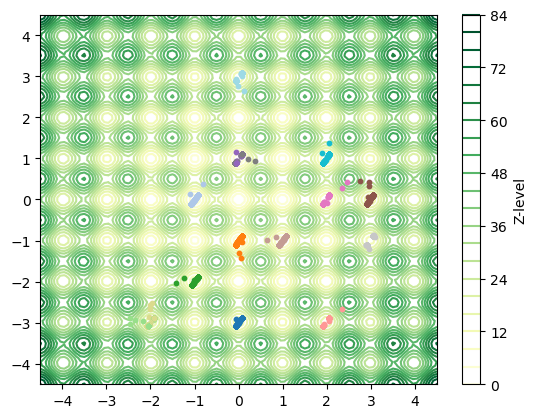

In [33]:
#Rastigin function and parameter space
XX = np.linspace(-4.5, 4.5, 100)     
YY = np.linspace(-4.5, 4.5, 100)     
XX, YY = np.meshgrid(XX, YY) 
Z = (XX**2 - 10 * np.cos(2 * np.pi * XX)) + \
    (YY**2 - 10 * np.cos(2 * np.pi * YY)) + 20

#Contour map 
fig, ax = plt.subplots()
#contour = ax.contour(XX, YY, Z, cmap=cm.nipy_spectral, levels=20)
contour = ax.contour(XX, YY, Z, cmap=cm.YlGn, levels=20)
contour_bar = plt.colorbar(contour, ax=ax, label='Z-level')

#Color map for particle iteration
norm = Normalize(vmin=0, vmax=ite - 1)
cmap = cm.cool 


colors = cm.tab20(np.linspace(0, 1, N))
#Plot particle in time sequence
for x in range(ite):
    """
    #if x > ite-5:
    #if x > ite-100:
    #if x == 0 or x == ite -1:
    #if x < 50:
    if x<30 or x>ite-50:
    #if x%50 == 0 or x<50 or x>ite-55:
        color = cmap(norm(x))
        plt.scatter(*X_save_4[:, x*N:(x+1)*N], s=10, color=[color], zorder=10)
    """
    #if x%30 == 0:
    if x%50 == 0 or x<50 or x>ite-55:
    #if x>ite-55:
        for j in range(N):
            if np.all(np.abs(X_save_3[:, x*N+j]) < 4.5):
                color = colors[j]
                plt.scatter(*X_save_3[:, x*N+j], s=10, color=color, zorder=10)
"""
#Color bar for particle iteration number
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # An empty array is needed for the colorbar
plt.colorbar(sm, label='Iteration')    
"""

#Download image as eps
#plt.title('Contour plot of gradient descent')
plt.savefig('Langevin.eps', format='eps')    
plt.show()


In [18]:
X_clean = X_save_4[:,np.any(abs(X_save_4)<4.5,axis=0)]

### Higher dimension testing

In [200]:
import numpy as np


#Initiate parameters
T = 100
h = 0.01
ite = 6000
A = 10
d = 12
N = 150
lambdaa = 0.15
runs = 100
#Random bounded particles


#Particle position for visualization
"""
X_save_1 = np.zeros((2,N*ite))
X_save_2 = np.zeros((2,N*ite))
X_save_3 = np.zeros((2,N*ite))
X_save_4 = np.zeros((2,N*ite))
"""
results2 = np.zeros((runs,1))
results = np.zeros((4,10))
#N_array = np.array([0.01,0.02,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.15])
#array = np.array([1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4])
#N_array = np.array([1.5,2,2.5,3,3.5,4,4.5,5,5.5,6])
N_array = np.array([1000,2000,3000,4000,5000,5500])
for j in range(1):
    alpha = N_array[j]
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    #while any(np.linalg.norm(X,axis=0)>0.1):
    for y in range(runs):
        
        X = np.random.rand(d,N)
        lower_bound = -3
        upper_bound = 3
        X = lower_bound + (upper_bound - lower_bound) * X
        """
        X_1 = X
        X_2 = X
        X_3 = X
        """
        X_4 = X
        for x in range(ite):
            
            #beta = alpha
            beta = 2.3#alpha #2.3
            if (x > 4000):
                beta = 100000
                
            
            """
            temp = alpha + 600
            if x <= alpha:
                # Start with noise large in the beginning and decreases over time
                beta = ite+ 5 - ite/(alpha)*(x)

            elif x <= temp:
                beta = 5

            else:
                # Exponentially increase noise after 100 iterations

                beta = 5 + ite/(ite-temp)*(x-temp)
            
            """
            """
            #Gradient descent without noise
            gradf_1 = 2*X_1 + 2*A*np.pi*np.sin(2*np.pi*X_1)

            X_1 = X_1 - lambdaa*gradf_1*h #+ np.sqrt(2/beta)*C_sqrt@xi*h**(1/2)

            #Gradient descent with noise
            gradf_2 = 2*X_2 + 2*A*np.pi*np.sin(2*np.pi*X_2)
            xi_2 = np.random.normal(0,1,(d,N))

            X_2 = X_2 - lambdaa*gradf_2*h + np.sqrt(2/beta)*xi_2*h**(1/2)

            #Covariance without noise
            X_3_bar = 1/N*np.sum(X_3,axis=1)
            Q_3 = X_3-X_3_bar[:,np.newaxis]
            C_3 = 1/N*np.matmul(Q_3,Q_3.T)
            gradf_3 = 2*X_3 + 2*A*np.pi*np.sin(2*np.pi*X_3)

            X_3 = X_3 - lambdaa*C_3@gradf_3*h
            """
            #Covariance with noise
            X_4_bar = 1/N*np.sum(X_4,axis=1)
            Q_4 = X_4-X_4_bar[:,np.newaxis]
            C_4 = 1/N*np.matmul(Q_4,Q_4.T)
            C_4_sqrt = 1/np.sqrt(N)*Q_4
            gradf_4 = 2*X_4 + 2*A*np.pi*np.sin(2*np.pi*X_4)
            xi_4 = np.random.normal(0,1,(N,N))
            #xi_4 = np.random.normal(0,1,(d,N))

            X_4 = X_4 - lambdaa*C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt@xi_4*h**(1/2)

            #X_save[:,x*N:(x+1)*N] = X
            """
            X_save_1[:,x*N:(x+1)*N] = X_1
            X_save_2[:,x*N:(x+1)*N] = X_2
            X_save_3[:,x*N:(x+1)*N] = X_3
            X_save_4[:,x*N:(x+1)*N] = X_4
        """    """
        a_1 = np.sum(np.exp(-20*Rast(X_1,A)))
        b_1 = np.sum(X_1*np.exp(-20*Rast(X_1,A)),axis=1)
        c_1=b_1/a_1
        
        a_2 = np.sum(np.exp(-20*Rast(X_2,A)))
        b_2 = np.sum(X_2*np.exp(-20*Rast(X_2,A)),axis=1)
        c_2=b_2/a_2
        
        a_3 = np.sum(np.exp(-20*Rast(X_3,A)))
        b_3 = np.sum(X_3*np.exp(-20*Rast(X_3,A)),axis=1)
        c_3=b_3/a_3
        """
        a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
        b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
        c_4=b_4/a_4
        
        """
        if np.linalg.norm(c_1)<0.1:
            count_1 +=1

        if np.linalg.norm(c_2)<0.1:
            count_2 +=1

        if np.linalg.norm(c_3)<0.1:
            count_3 +=1
        """
        if np.linalg.norm(c_4)<1:
            count_4 +=1
        results2[y,0] = np.mean(abs(lambdaa*C_4@gradf_4*h))
    """
    results[0,j] = count_1
    results[1,j] = count_2
    results[2,j] = count_3
    """
    results[3,j] = count_4
    

In [202]:
np.linalg.norm(c_4)

2.223991959753326

In [191]:
results

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 3., 2., 2., 0., 0., 0., 0.]])

In [167]:

np.mean(results2)

0.0005725478671540819

In [204]:

np.linalg.norm(c_4)

2.223991959753326

In [46]:
np.sqrt(2/beta)*C_4_sqrt@xi_4*h**(1/2)

array([[ 6.45111222e-04,  3.20966906e-04,  1.32496922e-03, ...,
        -5.64799626e-04, -4.30072099e-04,  7.03985249e-04],
       [ 5.62454732e-04,  2.38744945e-05,  4.70243910e-05, ...,
        -8.44437594e-04,  4.91861213e-04, -1.27104421e-03],
       [-5.28096846e-04,  6.24356852e-04, -5.92516262e-04, ...,
         4.31030630e-04,  5.37686723e-04,  6.16265759e-04],
       ...,
       [ 2.59117734e-05, -8.95441654e-04, -1.30442556e-04, ...,
        -3.13108593e-04,  7.26262379e-04, -7.53893354e-04],
       [-6.22739431e-05,  7.43824553e-04, -1.93328752e-04, ...,
         9.88220587e-04, -4.21887877e-04, -7.75548094e-04],
       [-1.25307473e-03,  6.76926085e-04,  7.32615257e-04, ...,
         8.43525437e-04, -3.36625835e-04, -2.31451320e-04]])

In [166]:
print(r"\begin{table}[]")
print(r"\begin{tabular}{l|llll}")
print(r"\backslashbox{Method}{$\alpha$-value}                                               & " + " & ".join([str(val) for val in N_array]) + r" \\ \hline")
for i, row in enumerate(results):
    method = ['Gradient descent &', 'Gradient descent with Brownian noise &', 'Ensemble Langevin dynamics &', 'Ensemble Langevin dynamics with Brownian noise &'][i]
    formatted_row = [f"{value/10:.1f}\%" for value in row]  # Convert each value to percentage
    print(f"{method:50}", end="")
    print(" & ".join(formatted_row), end=" \\\\\n")
print(r"\end{tabular}")
print(r"\end{table}")

\begin{table}[]
\begin{tabular}{l|llll}
\backslashbox{Method}{$\alpha$-value}                                               & 0.1 & 0.12 & 0.14 & 0.15 \\ \hline
Gradient descent &                                0.0\% & 0.0\% & 0.0\% & 0.0\% \\
Gradient descent with Brownian noise &            0.0\% & 0.0\% & 0.0\% & 0.0\% \\
Ensemble Langevin dynamics &                      0.0\% & 0.0\% & 0.0\% & 0.0\% \\
Ensemble Langevin dynamics with Brownian noise &  81.7\% & 85.3\% & 83.7\% & 84.5\% \\
\end{tabular}
\end{table}


## Second order 

### Second order Ensemble Langevin dynamics based optimization on Rastrigin

In [82]:
#Initiate parameters
T = 30
h = 0.03
ite = int(T/h)
A = 10
d = 2
N = 15
runs = 1000

#Results
results = np.zeros((4,4))
X_contour = np.zeros((d,N*int(T/h)))


#Tuning parameters
gamma = 1
alpha = 0.05

gamma_array = np.array([1,3,5,20])
alpha_array = np.array([1.5,1.8,2,2.5])
alpha_array = np.array([0.01,0.03,0.05,0.1])


h_array = np.array([0.01,0.03,0.05,0.1])
T_array = np.array([1,2,10,25])

X_4_arr = np.random.rand(d,N,runs)
lower_bound = -3
upper_bound = 3
X_4_arr2 = lower_bound + (upper_bound - lower_bound) * X_4_arr  


for j in range(4):
    #h = h_array[j]
    gamma = gamma_array[j]
    for k in range(4):
        #T = T_array[k]
        #ite = int(T/h)
        alpha = alpha_array[k]
        
        count_4 = 0
        for y in range(runs):
            #Random bounded particles and their velocity
            """
            X = np.random.rand(d,N)
            lower_bound = -3
            upper_bound = 3
            X_4 = lower_bound + (upper_bound - lower_bound) * X   
            """
            X_4 = X_4_arr2[:,:,y]
            V_4 = np.zeros((d,N))
            
            for x in range(ite):
                beta = alpha #3 #0.3
                if x > ite-50:
                    beta = 1000000

                #Covariance with noise
                X_4_bar = 1/N*np.sum(X_4,axis=1)
                Q_4 = X_4-X_4_bar[:,np.newaxis]
                C_4 = 1/N*np.matmul(Q_4,Q_4.T)
                C_4_sqrt = 1/np.sqrt(N)*Q_4
                gradf_4 = 2*(X_4) + 2*A*np.pi*np.sin(2*np.pi*(X_4))
                #xi_4 = np.random.normal(0,1,(N,N))
                xi_4 = np.random.normal(0,1,(d,N)) #Just testing
                
                #V_4 = V_4 - h*C_4@gradf_4/(1+h*np.abs(C_4@gradf_4)) - V_4*h*gamma + np.sqrt(2*gamma/beta)*C_4_sqrt@xi_4*h**(1/2)#/(1+h*np.abs(C_4_sqrt@xi_4)) this is right
                V_4 = V_4 - h*C_4@gradf_4/(1+h*np.abs(C_4@gradf_4)) - V_4*h*gamma + np.sqrt(2*gamma/beta)*C_4_sqrt*xi_4*h**(1/2)#/(1+h*np.abs(C_4_sqrt*xi_4))
                #V_4 = V_4 - h*C_4@gradf_4/(1+h*np.linalg.norm(C_4@gradf_4,axis=0)) - V_4*h*gamma + np.sqrt(2*gamma/beta)*C_4_sqrt@xi_4*h**(1/2)
                
                X_4 = X_4 + V_4*h 
                #X_4 = X_4 - h*C_4@gradf_4/(1+h*np.abs(C_4@gradf_4)) + np.sqrt(2*gamma/beta)*C_4_sqrt@xi_4*h**(1/2)/(1+h**(1/2)*np.abs(C_4_sqrt@xi_4))
                #X_contour[:,x*N:(x+1)*N] = X_4
                """"
                a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
                b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
                c_4 = b_4/a_4
                dist[0,x] = np.linalg.norm(c_4)
                """
            a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
            b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
            c_4 = b_4/a_4
            #assert not np.any(np.isnan(c_4))
            #box[0,y] = np.linalg.norm(c_4)
            #if np.linalg.norm(c_4)<0.1:
            if np.all(abs(c_4)<0.20):
                count_4 += 1

        #Saving the results
        results[j,k] = count_4
results

C:\Users\gveva\AppData\Local\Temp\ipykernel_13324\2828676740.py:82: RuntimeWarning: invalid value encountered in divide
  c_4 = b_4/a_4


array([[  0.,  81., 558., 692.],
       [  2., 435., 752., 649.],
       [ 52., 553., 832., 569.],
       [308., 764., 695., 446.]])

In [84]:
X_4

array([[ 1.14075596e-05, -3.98343107e+00, -2.95151727e-05,
         1.41420379e-04,  9.96336522e-01,  1.98718925e+00,
         9.98757140e-01, -9.97052098e-01, -2.50529178e-05,
        -9.93366422e-01,  9.94305055e-01, -2.07385110e-05,
         9.93005942e-01, -1.89011676e-05, -2.08385430e-05],
       [ 4.82885261e-04,  2.02336981e-03,  9.94244241e-01,
        -7.07332906e-05, -9.95305891e-01, -7.59552521e-04,
         9.99294975e-01, -9.95000458e-01,  9.94566332e-01,
         9.94555049e-01,  9.46485313e-04,  9.99509751e-01,
        -9.97374470e-01,  9.94547721e-01,  9.94750157e-01]])

In [84]:
arr = results
#gamma_array = np.array([0,0.1,0.3,0.5]) #down
#gamma2_array = np.array([1,0.9,0.7,0.5]) #right
# Generate LaTeX code for the table
latex_code = "\\begin{table}[htbp]\n"
latex_code += "\\caption{Your table caption here.}\n"
latex_code += "\\centering\n"
latex_code += "\\begin{tabular}{|c|"
for i in range(len(arr)):
    latex_code += "c|"
latex_code += "}\n"
latex_code += "\\hline\n"

# Add alpha values as the first row
latex_code += "$\\alpha$ & "
for i in range(len(arr)):
    latex_code += f"${alpha_array[i]}$ & "
latex_code = latex_code[:-2] + "\\\\\n"
latex_code += "\\hline\n"

# Add beta values as the first column and the table values
for i, row in enumerate(arr):
    latex_code += f"${gamma_array[i]}$ & "
    for value in row:
        latex_code += f"{value/10:.1f} \%& "
    latex_code = latex_code[:-2] + "\\\\\n"
    latex_code += "\\hline\n"

latex_code += "\\end{tabular}\n"

latex_code += "\\label{tab:my_table}\n"
latex_code += "\\end{table}\n"
print(latex_code)

\begin{table}[htbp]
\caption{Your table caption here.}
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
$\alpha$ & $0.01$ & $0.03$ & $0.05$ & $0.1$ \\
\hline
$1$ & 0.0 \%& 8.1 \%& 55.8 \%& 69.2 \%\\
\hline
$3$ & 0.2 \%& 43.5 \%& 75.2 \%& 64.9 \%\\
\hline
$5$ & 5.2 \%& 55.3 \%& 83.2 \%& 56.9 \%\\
\hline
$20$ & 30.8 \%& 76.4 \%& 69.5 \%& 44.6 \%\\
\hline
\end{tabular}
\label{tab:my_table}
\end{table}



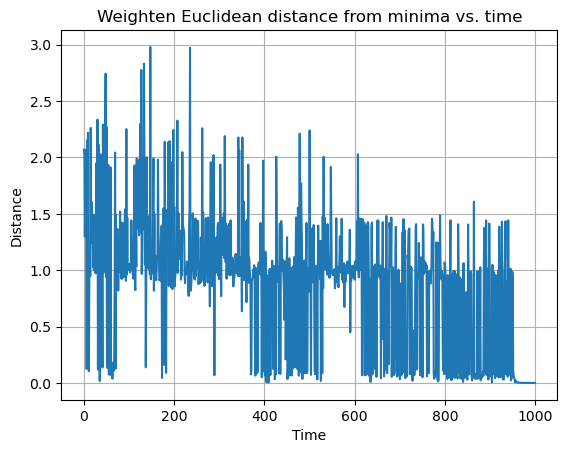

In [113]:
x_lin = np.zeros((1,1000))
for x in range(ite):
    x_lin[0,x] = x

# Plot
plt.plot(x_lin[0,:],dist[0,:])
plt.title(r'Weighten Euclidean distance from minima vs. time')
plt.xlabel('Time')
plt.ylabel(r'Distance')
plt.grid(True)
plt.savefig('Sec_Rast_Dist.eps', format='eps')    
plt.show()

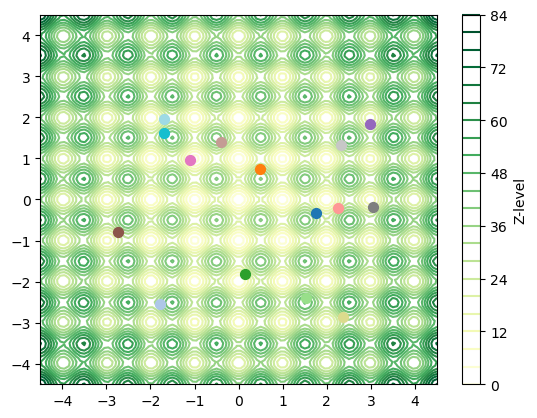

In [96]:
#Rastigin function and parameter space
XX = np.linspace(-4.5, 4.5, 100)     
YY = np.linspace(-4.5, 4.5, 100)     
XX, YY = np.meshgrid(XX, YY) 
Z = (XX**2 - 10 * np.cos(2 * np.pi * XX)) + \
    (YY**2 - 10 * np.cos(2 * np.pi * YY)) + 20

#Contour map 
fig, ax = plt.subplots()
#contour = ax.contour(XX, YY, Z, cmap=cm.nipy_spectral, levels=20)
contour = ax.contour(XX, YY, Z, cmap=cm.YlGn, levels=20)
contour_bar = plt.colorbar(contour, ax=ax, label='Z-level')

#Color map for particle iteration
norm = Normalize(vmin=0, vmax=ite - 1)
cmap = cm.cool 


colors = cm.tab20(np.linspace(0, 1, N))
#Plot particle in time sequence
for x in range(ite):
    """
    #if x > ite-5:
    #if x > ite-100:
    #if x == 0 or x == ite -1:
    #if x < 50:
    if x<30 or x>ite-50:
    #if x%50 == 0 or x<50 or x>ite-55:
        color = cmap(norm(x))
        plt.scatter(*X_save_4[:, x*N:(x+1)*N], s=10, color=[color], zorder=10)
    """
    #if x%30 == 0:
    #if x%50 == 0 or x<50 or x>ite-55:
    if x == 0 or x>ite-1:
        for j in range(N):
            color = colors[j]
            plt.scatter(*X_contour[:, x*N+j], s=50, color=color, zorder=10)
"""
#Color bar for particle iteration number
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # An empty array is needed for the colorbar
plt.colorbar(sm, label='Iteration')    
"""

#Download image as eps

#plt.savefig('SecondRast_low_noise.eps', format='eps')    
plt.show()


In [86]:
X_4

array([[ 1.14075596e-05, -3.98343107e+00, -2.95151727e-05,
         1.41420379e-04,  9.96336522e-01,  1.98718925e+00,
         9.98757140e-01, -9.97052098e-01, -2.50529178e-05,
        -9.93366422e-01,  9.94305055e-01, -2.07385110e-05,
         9.93005942e-01, -1.89011676e-05, -2.08385430e-05],
       [ 4.82885261e-04,  2.02336981e-03,  9.94244241e-01,
        -7.07332906e-05, -9.95305891e-01, -7.59552521e-04,
         9.99294975e-01, -9.95000458e-01,  9.94566332e-01,
         9.94555049e-01,  9.46485313e-04,  9.99509751e-01,
        -9.97374470e-01,  9.94547721e-01,  9.94750157e-01]])

#### Some saved results

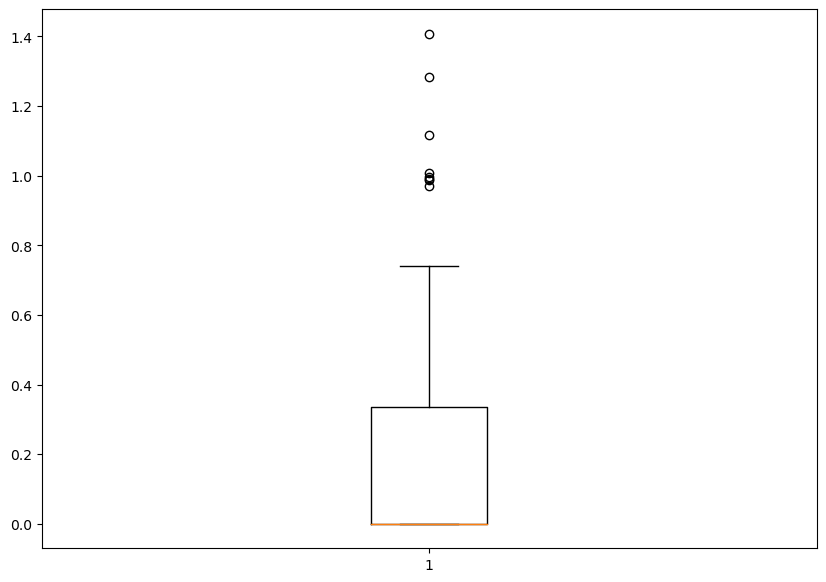

In [86]:
import matplotlib.pyplot as plt
import numpy as np
  
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(box[2,:])
 
# show plot
plt.show()

### Second order tested on Rosenbrock function

In [67]:
#Initiate parameters
T = 30#30
h = 0.03#0.03
h2 = 0.0015 
ite = int(T/h)
d = 2
N = 15
runs = 1

#Results
results = np.zeros((4,4))

X_contour = np.zeros((d,N*int(T/h)))
X2_contour = np.zeros((d,N*int(T/h)))
"""
X_mean_contour = np.zeros((d,int(T/h)))
X2_mean_contour = np.zeros((d,int(T/h)))
"""

#Tuning parameters
gamma = 1
alpha = 2

gamma_array = np.array([0.5,1,3,5])
alpha_array = np.array([1,3,5,10])
alpha_array = np.array([1,2,3,5])
alpha_array = np.array([2,4,8,16])

#first order
#alpha_array = np.array([0.5,2,3,100])
#h_array = np.array([0.001,0.0015,0.002,0.003])
#T_array = np.array([0.015,0.15,0.3,1])
#T_array2 = np.array([0.1,0.15,0.2,0.3])

h_array = np.array([0.01,0.03,0.05,0.1])
h2_array = np.array([0.0005,0.0015,0.0025,0.005])
T_array = np.array([1,2,10,25])
T_array = np.array([0.05,0.1,0.5,1.25])

X_4_arr = np.random.rand(d,N,runs)
lower_bound = -3
upper_bound = 3
X_4_arr2 = lower_bound + (upper_bound - lower_bound) * X_4_arr  


for j in range(1):
    #h2 = h2_array[j]
    #gamma = gamma_array[j]
    for k in range(1):
        #h = h_array[k]
        #T = T_array[k]
        #ite = int(T/h2)
        #alpha = alpha_array[k]
        
        count_3 = 0
        count_4 = 0
        for y in range(runs):
            #Random bounded particles and their velocity
            """
            X = np.random.rand(d,N)
            lower_bound = -3
            upper_bound = 3
            X_4 = lower_bound + (upper_bound - lower_bound) * X   
            """
            X_4 = X_4_arr2[:,:,y]
            V_4 = np.zeros((d,N))
            
            X_3 = X_4_arr2[:,:,y]

            for x in range(ite):
                beta = alpha #3 #0.3
                if x > ite-50:
                    beta = 1000000
                    
                    
                    
                
                X_contour[:,x*N:(x+1)*N] = X_4
                X2_contour[:,x*N:(x+1)*N] = X_3
                
                """
                a_4 = np.sum(np.exp(-20*Rose2D(X_4)))
                b_4 = np.sum(X_4*np.exp(-20*Rose2D(X_4)),axis=1)
                c_4 = b_4/a_4

                a_3 = np.sum(np.exp(-20*Rose2D(X_3)))
                b_3 = np.sum(X_3*np.exp(-20*Rose2D(X_3)),axis=1)
                c_3 = b_3/a_3
                
                X_mean_contour[:,x] = c_4
                X2_mean_contour[:,x] = c_3
                """
                """
                """
                #Covariance with noise
                X_4_bar = 1/N*np.sum(X_4,axis=1)
                Q_4 = X_4-X_4_bar[:,np.newaxis]
                C_4 = 1/N*np.matmul(Q_4,Q_4.T)
                C_4_sqrt = 1/np.sqrt(N)*Q_4
                X = X_4[0,:]
                Y = X_4[1,:]
                x_dim = -2*(1-X)-4*100*X*(Y-X**2)
                y_dim = 2*100*(Y-X**2)                
                gradf_4 = np.array([x_dim,y_dim])
                xi_4 = np.random.normal(0,1,(d,N))
                """

                """
                noise = np.sqrt(2*gamma/beta)*C_4_sqrt*xi_4*h**(1/2)
                V_4 = V_4 - h*C_4@gradf_4/(1+h*np.abs(C_4@gradf_4)) - V_4*h*gamma + noise#np.sqrt(2*gamma/beta)*C_4_sqrt@xi_4*h**(1/2)#/(1+h*np.abs(C_4_sqrt@xi_4))
                #V_4 = V_4 - h*C_4@gradf_4/(1+h*np.linalg.norm(C_4@gradf_4,axis=0)) - V_4*h*gamma + np.sqrt(2*gamma/beta)*C_4_sqrt@xi_4*h**(1/2)
                X_4 = X_4 + V_4*h
                

                """
                
                
                """
                
                X_3_bar = 1/N*np.sum(X_3,axis=1)
                Q_3 = X_3-X_3_bar[:,np.newaxis]
                C_3 = 1/N*np.matmul(Q_3,Q_3.T)
                C_3_sqrt = 1/np.sqrt(N)*Q_3
                X2 = X_3[0,:]
                Y2 = X_3[1,:]
                x_3_dim = -2*(1-X2)-4*100*X2*(Y2-X2**2)
                y_3_dim = 2*100*(Y2-X2**2)                
                gradf_3 = np.array([x_3_dim,y_3_dim])
                xi_3 = np.random.normal(0,1,(N,N))
                
                #First order
                X_3 = X_3 - h2*C_3@gradf_3/(1+h2*np.abs(C_3@gradf_3)) + np.sqrt(2/beta)*C_3_sqrt@xi_3*h2**(1/2)
                
                
                
                """"
                a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
                b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
                c_4 = b_4/a_4
                dist[0,x] = np.linalg.norm(c_4)
            
            """
            
            a_4 = np.sum(np.exp(-20*Rose2D(X_4)))
            b_4 = np.sum(X_4*np.exp(-20*Rose2D(X_4)),axis=1)
            c_4 = b_4/a_4
            #assert not np.any(np.isnan(c_4))
            
            a_3 = np.sum(np.exp(-20*Rose2D(X_3)))
            b_3 = np.sum(X_3*np.exp(-20*Rose2D(X_3)),axis=1)
            c_3 = b_3/a_3
            
            #box[0,y] = np.linalg.norm(c_4)
            #if np.linalg.norm(c_4)<0.1:
            if np.all(abs(c_4-np.array([1,1]))<0.20):
                count_4 += 1
                
            if np.all(abs(c_3-np.array([1,1]))<0.20):
                count_3 += 1
            
        #Saving the results
        #results[j,k] = count_3
        
        results[0,0] = count_4
        results[0,1] = count_3
        
results

array([[1., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [42]:
arr = results
#gamma_array = np.array([0,0.1,0.3,0.5]) #down
#gamma2_array = np.array([1,0.9,0.7,0.5]) #right
# Generate LaTeX code for the table
latex_code = "\\begin{table}[htbp]\n"
latex_code += "\\caption{Your table caption here.}\n"
latex_code += "\\centering\n"
latex_code += "\\begin{tabular}{|c|"
for i in range(len(arr)):
    latex_code += "c|"
latex_code += "}\n"
latex_code += "\\hline\n"

# Add alpha values as the first row
latex_code += "$\\alpha$ & "
for i in range(len(arr)):
    latex_code += f"${T_array[i]}$ & "
latex_code = latex_code[:-2] + "\\\\\n"
latex_code += "\\hline\n"

# Add beta values as the first column and the table values
for i, row in enumerate(arr):
    latex_code += f"${h_array[i]}$ & "
    for value in row:
        latex_code += f"{value/10:.1f} \%& "
    latex_code = latex_code[:-2] + "\\\\\n"
    latex_code += "\\hline\n"

latex_code += "\\end{tabular}\n"

latex_code += "\\label{tab:my_table}\n"
latex_code += "\\end{table}\n"
print(latex_code)

\begin{table}[htbp]
\caption{Your table caption here.}
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
$\alpha$ & $0.05$ & $0.1$ & $0.5$ & $1.25$ \\
\hline
$0.01$ & 61.0 \%& 63.6 \%& 76.3 \%& 83.9 \%\\
\hline
$0.03$ & 60.9 \%& 61.6 \%& 77.5 \%& 86.6 \%\\
\hline
$0.05$ & 42.6 \%& 53.2 \%& 79.9 \%& 82.0 \%\\
\hline
$0.1$ & 8.7 \%& 14.8 \%& 50.7 \%& 65.3 \%\\
\hline
\end{tabular}
\label{tab:my_table}
\end{table}



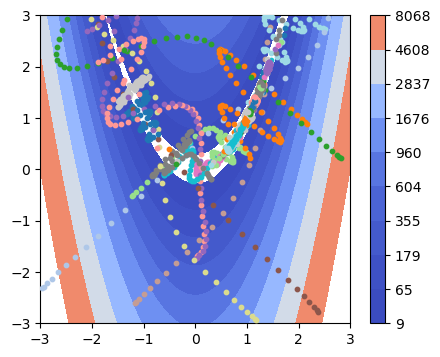

In [74]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import openturns as ot 

class Draw2DFunctions:
    def __init__(self, lowerbound, upperbound):
        self.grid_size = 100
        mesher = ot.IntervalMesher([self.grid_size-1] * 2)
        interval = ot.Interval(lowerbound, upperbound)
        mesh = mesher.build(interval)
        self.nodes = mesh.getVertices()
        self.X0, self.X1 = np.array(self.nodes).T.reshape(2, self.grid_size, self.grid_size)

    def draw_2D_contour(self, title, function=None, distribution=None, colorbar=cm.coolwarm, nb_isocurves=8, contour_values=True, opt_function_levels=True):
        fig = plt.figure(figsize=(5, 4))
        if distribution is not None:
            Zpdf = np.array(distribution.computePDF(self.nodes)).reshape(self.grid_size, self.grid_size)
            contours = plt.contour(self.X0, self.X1, Zpdf, nb_isocurves, colors='black', alpha=0.6)
            if contour_values:
                plt.clabel(contours, inline=True, fontsize=8)
        if function is not None:
            Z = np.array(function(self.nodes)).reshape(self.grid_size, self.grid_size)
            if opt_function_levels: 
                Z_sample = ot.Sample.BuildFromPoint(Z.flatten())
                # Compute levels
                nb_levels = 10
                epsilon_grid = 5e-2
                regular_grid = np.linspace(epsilon_grid, 1.0 - epsilon_grid, nb_levels)
                computed_levels = np.array(Z_sample.computeQuantile(regular_grid)).flatten()
            else: 
                computed_levels = 20
            plt.contourf(self.X0, self.X1, Z, levels=computed_levels, cmap=colorbar)
            plt.colorbar()
        #plt.title(title, fontsize=20)
        #plt.xlabel("$x_0$", fontsize=20)
        #plt.ylabel("$x_1$", fontsize=20)
        return fig
#
rosenbrock = ot.SymbolicFunction(["x1", "x2"], ["(1 - x1)^2 + 100 * (x2 - x1^2)^2"])
#funky_distribution = ot.ComposedDistribution([ot.Normal(0., 0.7)] * 2, ot.ClaytonCopula(2.))
d = Draw2DFunctions([-3.] * 2, [3.] * 2)
d.draw_2D_contour("Rosenbrock function", function=rosenbrock)#, distribution=funky_distribution, colorbar=cm.plasma)
colors = cm.tab20(np.linspace(0, 1, N))
#Plot particle in time sequence
for x in range(ite):
    if x%50 == 0 or x<50 or x>ite-50:
    #if x>ite-100:
        for j in range(N):
            if np.all(np.abs(X_contour[:, x*N+j]) < 3):
                color = colors[j]
                plt.scatter(*X_contour[:, x*N+j], s=10, color=color, zorder=10)
        #plt.scatter(*X_mean_contour[:, x], s=25, color="red", zorder=15)
#plt.scatter(1, 1, s=50, c='black', marker='o', label='Minimum at (1, 1)')
#plt.savefig('SecondRosenContour.eps', format='eps')    
plt.show()

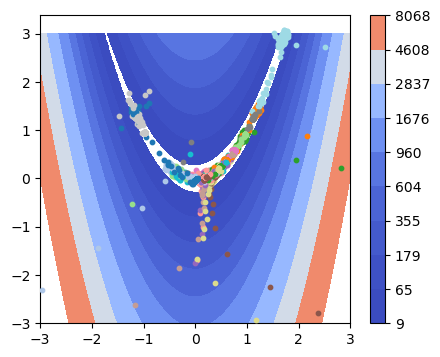

In [73]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import openturns as ot 

class Draw2DFunctions:
    def __init__(self, lowerbound, upperbound):
        self.grid_size = 100
        mesher = ot.IntervalMesher([self.grid_size-1] * 2)
        interval = ot.Interval(lowerbound, upperbound)
        mesh = mesher.build(interval)
        self.nodes = mesh.getVertices()
        self.X0, self.X1 = np.array(self.nodes).T.reshape(2, self.grid_size, self.grid_size)

    def draw_2D_contour(self, title, function=None, distribution=None, colorbar=cm.coolwarm, nb_isocurves=8, contour_values=True, opt_function_levels=True):
        fig = plt.figure(figsize=(5, 4))
        if distribution is not None:
            Zpdf = np.array(distribution.computePDF(self.nodes)).reshape(self.grid_size, self.grid_size)
            contours = plt.contour(self.X0, self.X1, Zpdf, nb_isocurves, colors='black', alpha=0.6)
            if contour_values:
                plt.clabel(contours, inline=True, fontsize=8)
        if function is not None:
            Z = np.array(function(self.nodes)).reshape(self.grid_size, self.grid_size)
            if opt_function_levels: 
                Z_sample = ot.Sample.BuildFromPoint(Z.flatten())
                # Compute levels
                nb_levels = 10
                epsilon_grid = 5e-2
                regular_grid = np.linspace(epsilon_grid, 1.0 - epsilon_grid, nb_levels)
                computed_levels = np.array(Z_sample.computeQuantile(regular_grid)).flatten()
            else: 
                computed_levels = 20
            plt.contourf(self.X0, self.X1, Z, levels=computed_levels, cmap=colorbar)
            plt.colorbar()
        #plt.title(title, fontsize=20)
        #plt.xlabel("$x_0$", fontsize=20)
        #plt.ylabel("$x_1$", fontsize=20)
        return fig
#
rosenbrock = ot.SymbolicFunction(["x1", "x2"], ["(1 - x1)^2 + 100 * (x2 - x1^2)^2"])
#funky_distribution = ot.ComposedDistribution([ot.Normal(0., 0.7)] * 2, ot.ClaytonCopula(2.))
d = Draw2DFunctions([-3.] * 2, [3.] * 2)
d.draw_2D_contour("Rosenbrock function", function=rosenbrock)#, distribution=funky_distribution, colorbar=cm.plasma)
colors = cm.tab20(np.linspace(0, 1, N))
#Plot particle in time sequence
for x in range(ite):
    if x%50 == 0 or x<50 or x>ite-50:
    #if x>ite-100:
        for j in range(N):
            color = colors[j]
            plt.scatter(*X2_contour[:, x*N+j], s=10, color=color, zorder=10)
        #plt.scatter(*X2_mean_contour[:, x], s=25, color="red", zorder=15)
#plt.scatter(1, 1, s=50, c='black', marker='o', label='Minimum at (1, 1)')
#plt.savefig('FirstRosenContour.eps', format='eps')    
plt.show()

### Second order HimmelBlau

In [29]:
#Initiate parameters
T = 30#30
h = 0.03#0.03
h2 = 0.0015 
ite = int(T/h)
d = 2
N = 15
runs = 1

#Results
results = np.zeros((4,4))

X_contour = np.zeros((d,N*int(T/h)))
X2_contour = np.zeros((d,N*int(T/h)))
"""
X_mean_contour = np.zeros((d,int(T/h)))
X2_mean_contour = np.zeros((d,int(T/h)))
"""

#Tuning parameters
gamma = 1
alpha = 5

gamma_array = np.array([1,3,5,15])
alpha_array = np.array([1,3,5,10])

h_array = np.array([0.01,0.03,0.05,0.1])
T_array = np.array([1,2,10,25])

#first order
#alpha_array = np.array([0.5,2,3,100])
#h_array = np.array([0.0015,0.015,0.15,0.3])
#T_array = np.array([1.5,15,30,35])
#T_array2 = np.array([0.1,0.15,0.2,0.3])



X_4_arr = np.random.rand(d,N,runs)
lower_bound = -3
upper_bound = 3
X_4_arr2 = lower_bound + (upper_bound - lower_bound) * X_4_arr  


for j in range(1):
    #h = h_array[j]
    #gamma = gamma_array[j]
    for k in range(1):
        #h = h_array[k]
        #T = T_array[k]
        #ite = int(T/h)
        #alpha = alpha_array[k]
        
        count_3 = 0
        count_4 = 0
        for y in range(runs):
            #Random bounded particles and their velocity
            X_4 = X_4_arr2[:,:,y]
            V_4 = np.zeros((d,N))
            
            X_3 = X_4_arr2[:,:,y]

            for x in range(ite):
                beta = alpha #3 #0.3
                if x > ite-50:
                    beta = 1000000
                #Covariance with noise
                """
                X_contour[:,x*N:(x+1)*N] = X_4
                X_4_bar = 1/N*np.sum(X_4,axis=1)
                Q_4 = X_4-X_4_bar[:,np.newaxis]
                C_4 = 1/N*np.matmul(Q_4,Q_4.T)
                C_4_sqrt = 1/np.sqrt(N)*Q_4
                X = X_4[0,:]
                Y = X_4[1,:]
                x_dim = 4*X*(X**2+Y-11) + 2*(X+Y**2-7)
                y_dim = 2*(X**2+Y-11) + 4*Y*(X+Y**2-7)               
                gradf_4 = np.array([x_dim,y_dim])
                xi_4 = np.random.normal(0,1,(N,N))

                noise = np.sqrt(2*gamma/beta)*C_4_sqrt@xi_4*h**(1/2)
                V_4 = V_4 - h*C_4@gradf_4/(1+h*np.abs(C_4@gradf_4)) - V_4*h*gamma + noise#np.sqrt(2*gamma/beta)*C_4_sqrt@xi_4*h**(1/2)#/(1+h*np.abs(C_4_sqrt@xi_4))
                #V_4 = V_4 - h*C_4@gradf_4/(1+h*np.linalg.norm(C_4@gradf_4,axis=0)) - V_4*h*gamma + np.sqrt(2*gamma/beta)*C_4_sqrt@xi_4*h**(1/2)
                X_4 = X_4 + V_4*h
                """
                
                
                X2_contour[:,x*N:(x+1)*N] = X_3
                X_3_bar = 1/N*np.sum(X_3,axis=1)
                Q_3 = X_3-X_3_bar[:,np.newaxis]
                C_3 = 1/N*np.matmul(Q_3,Q_3.T)
                C_3_sqrt = 1/np.sqrt(N)*Q_3
                X2 = X_3[0,:]
                Y2 = X_3[1,:]
                x_3_dim = 4*X2*(X2**2+Y2-11) + 2*(X2+Y2**2-7)
                y_3_dim = 2*(X2**2+Y2-11) + 4*Y2*(X2+Y2**2-7)            
                gradf_3 = np.array([x_3_dim,y_3_dim])
                xi_3 = np.random.normal(0,1,(N,N))
                
                #First order
                X_3 = X_3 - h2*C_3@gradf_3/(1+h2*np.abs(C_3@gradf_3)) + np.sqrt(2/beta)*C_3_sqrt@xi_3*h2**(1/2)
                
                
                
            
            a_3 = np.sum(np.exp(-20*Himmel(X_3)))
            b_3 = np.sum(X_3*np.exp(-20*Himmel(X_3)),axis=1)
            c_3 = b_3/a_3
            """
            a_4 = np.sum(np.exp(-20*Himmel(X_4)))
            b_4 = np.sum(X_4*np.exp(-20*Himmel(X_4)),axis=1)
            c_4 = b_4/a_4
            """
            #box[0,y] = np.linalg.norm(c_4)
            #if np.linalg.norm(c_4)<0.1:
            """
            if np.all(abs(c_4-np.array([3,2]))<0.20) or np.all(abs(c_4-np.array([-2.805118,3.131312]))<0.20) or np.all(abs(c_4-np.array([-3.779310,-3.283186]))<0.20) or np.all(abs(c_4-np.array([3.584428,-1.848126]))<0.20):
                count_4 += 1
            """
            #if np.all(abs(c_3-np.array([3,2]))<0.20) or np.all(abs(c_3-np.array([-2.805118,3.131312]))<0.20) or np.all(abs(c_3-np.array([-3.779310,-3.283186]))<0.20) or np.all(abs(c_3-np.array([3.584428,-1.848126]))<0.20):
            #    count_3 += 1
            
                
        #Saving the results
        #results[j,k] = count_4
        """
        results[0,0] = count_4
        results[0,1] = count_3
        """
results

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [24]:
X_4

array([[-3.77384651, -3.7761864 ,  3.56182103,  3.56917095,  3.59875267,
         3.01672967,  3.06901489, -3.82721478, -2.79763531, -2.86659503,
        -2.91462191, -2.83641045,  3.06613054,  3.54151942, -3.76071907],
       [-3.29018996, -3.28196586, -1.82847856, -1.77769227, -1.79413215,
         1.97838625,  1.86684375, -3.29414917,  3.13099944,  3.21787793,
         3.07401347,  3.14622474,  1.98406521, -1.93452167, -3.29518193]])

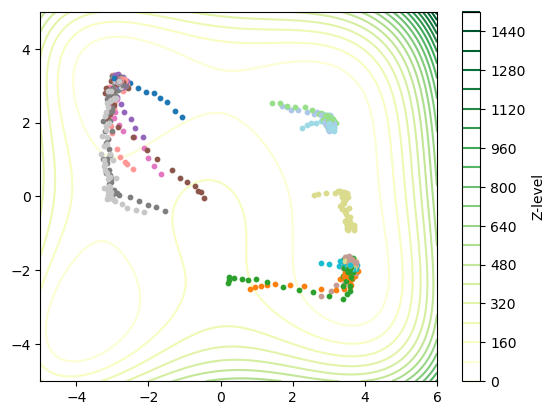

In [31]:
#Rastigin function and parameter space
XX = np.linspace(-5, 6, 100)     
YY = np.linspace(-5, 5, 100)     
XX, YY = np.meshgrid(XX, YY) 
Z = (XX**2+YY-11)**2+(XX+YY**2-7)**2

#Contour map 
fig, ax = plt.subplots()
#contour = ax.contour(XX, YY, Z, cmap=cm.nipy_spectral, levels=20)
contour = ax.contour(XX, YY, Z, cmap=cm.YlGn, levels=20)
contour_bar = plt.colorbar(contour, ax=ax, label='Z-level')

#Color map for particle iteration
norm = Normalize(vmin=0, vmax=ite - 1)
cmap = cm.cool 


colors = cm.tab20(np.linspace(0, 1, N))
#Plot particle in time sequence
for x in range(ite):
    if x%50 == 0 or x<50 or x>ite-55:
    #if x<30:
    #if x>ite-55:
        for j in range(N):
            color = colors[j]
            plt.scatter(*X2_contour[:, x*N+j], s=10, color=color, zorder=10)


#Download image as eps
plt.savefig('FirstHimmelContour.eps', format='eps')    
plt.show()

In [16]:
c_3

array([-3.06553859,  3.2773283 ])

### Second order tested on Ackleyt function

In [114]:
#Initiate parameters
T = 10
h = 0.01
ite = 1000
A = 10
d = 2
N = 15
runs = 1
Shift = np.array([0,0])
X_save_4 = np.zeros((2,N*ite))
#Saves
results = np.zeros((6,6))
box = np.zeros((1,runs))
dist = np.zeros((1,ite))

#Tuning parameters
lambdaa = 5
gamma = 10

lambdaa_array = np.array([0.01,0.1,1,5,10,20])
gamma_array = np.array([1,10,25,50,75,90])
beta_array = np.array([0.5,2,5,10,25,50])
beta_func_array = np.array([750,800,850,900,950,1000])


for j in range(1):
    #lambdaa = lambdaa_array[j]
    alpha = beta_array[j]
    for k in range(1):
        #gamma = gamma_array[k]
        beta_func = beta_func_array[k]

        count_4 = 0
        for y in range(runs):
            #Random bounded particles and their velocity
            X = np.random.rand(d,N)
            lower_bound = -3
            upper_bound = 3
            X_4 = lower_bound + (upper_bound - lower_bound) * X   
            V_4 = np.zeros((d,N))

            for x in range(ite):
                beta = 2#2 #-8/(950**int(alpha))*(x**int(alpha))
                if x > 950:#950:
                    beta = 1000000

                #Covariance with noise
                X_4_bar = 1/N*np.sum(X_4,axis=1)
                Q_4 = X_4-X_4_bar[:,np.newaxis]
                C_4 = 1/N*np.matmul(Q_4,Q_4.T)
                C_4_sqrt = 1/np.sqrt(N)*Q_4
                
                
                
                pre = np.pi*np.exp((np.cos(2*np.pi*X_4[0,:])+np.cos(2*np.pi*X_4[1,:]))/2)*np.sin(2*np.pi*X_4)                
                aff = 2**(3/2)*X_4*np.exp(-(np.sqrt(X_4[0,:]**2+X_4[1,:]**2)/(5*np.sqrt(2))))/(np.sqrt(X_4[0,:]**2+X_4[1,:]**2))
                gradf_4 = pre + aff
                
                
                xi_4 = np.random.normal(0,1,(N,N))

                X_4 = X_4 + V_4*h
                V_4 = V_4 - gamma*V_4*h - lambdaa*C_4@gradf_4*h + np.sqrt(2*gamma*lambdaa/beta)*C_4_sqrt@xi_4*h**(1/2)  #Don't forget to add back lambda and gamma later
                #V_4 = gamma*V_4 - lambdaa*C_4@gradf_4 + beta*C_4_sqrt@xi_4  #Don't forget to add back lambda and gamma later
                X_save_4[:,x*N:(x+1)*N] = X_4
                
                a_4 = np.sum(np.exp(-20*Ackley(X_4)))
                b_4 = np.sum(X_4*np.exp(-20*Ackley(X_4)),axis=1)
                c_4 = b_4/a_4
                dist[0,x] = np.linalg.norm(c_4)
                
            a_4 = np.sum(np.exp(-20*Ackley(X_4)))
            b_4 = np.sum(X_4*np.exp(-20*Ackley(X_4)),axis=1)
            c_4 = b_4/a_4
            
            box[0,y] = np.linalg.norm(c_4)
            
            if np.linalg.norm(c_4)<0.1:
                count_4 += 1
        #Saving the results
        results[j,k] = count_4
results

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

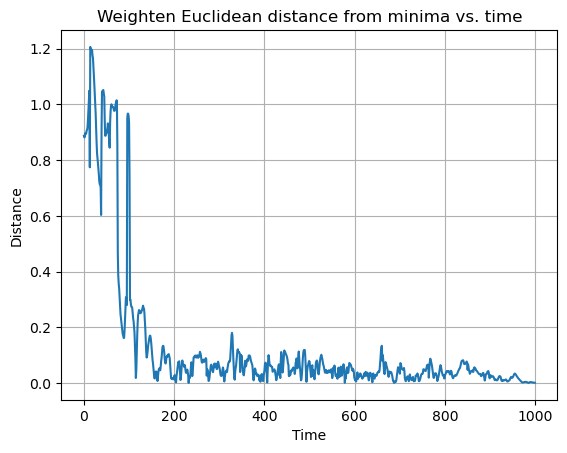

In [115]:
x_lin = np.zeros((1,1000))
for x in range(ite):
    x_lin[0,x] = x

# Plot
plt.plot(x_lin[0,:],dist[0,:])
plt.title(r'Weighten Euclidean distance from minima vs. time')
plt.xlabel('Time')
plt.ylabel(r'Distance')
plt.grid(True)
plt.savefig('Sec_Ackley_Dist.eps', format='eps')    
plt.show()

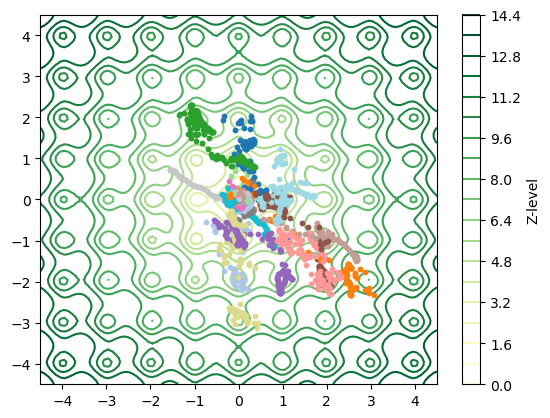

In [32]:
#Rastigin function and parameter space
XX = np.linspace(-4.5, 4.5, 100)     
YY = np.linspace(-4.5, 4.5, 100)     
XX, YY = np.meshgrid(XX, YY) 
Z = -20*np.exp(-0.2*np.sqrt(0.5*(XX**2+YY**2))) - np.exp(0.5*(np.cos(2*np.pi*XX)+np.cos(2*np.pi*YY))) + np.e + 20
#Contour map 
fig, ax = plt.subplots()
#contour = ax.contour(XX, YY, Z, cmap=cm.nipy_spectral, levels=20)
contour = ax.contour(XX, YY, Z, cmap=cm.YlGn, levels=20)
contour_bar = plt.colorbar(contour, ax=ax, label='Z-level')

#Color map for particle iteration
norm = Normalize(vmin=0, vmax=ite - 1)
cmap = cm.cool 


colors = cm.tab20(np.linspace(0, 1, N))
#Plot particle in time sequence
for x in range(ite):
    """
    #if x > ite-5:
    #if x > ite-100:
    #if x == 0 or x == ite -1:
    #if x < 50:
    if x<30 or x>ite-50:
    #if x%50 == 0 or x<50 or x>ite-55:
        color = cmap(norm(x))
        plt.scatter(*X_save_4[:, x*N:(x+1)*N], s=10, color=[color], zorder=10)
    """
    #if x%30 == 0:
    if x%10 == 0 or x<50 or x>ite-55:
        for j in range(N):
            color = colors[j]
            plt.scatter(*X_save_4[:, x*N+j], s=10, color=color, zorder=10)
"""
#Color bar for particle iteration number
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # An empty array is needed for the colorbar
plt.colorbar(sm, label='Iteration')    
"""

#Download image as eps
plt.savefig('SecondAckl.eps', format='eps')    
plt.show()


In [98]:
results

array([[ 864.,  856.,  856.,  856.,  793.,  134.],
       [1000., 1000., 1000., 1000., 1000.,  999.],
       [1000., 1000., 1000., 1000., 1000.,  996.],
       [ 834.,  834.,  863.,  862.,  848.,  787.],
       [ 571.,  573.,  567.,  566.,  564.,  559.],
       [ 503.,  526.,  514.,  525.,  535.,  474.]])

In [100]:
# Generate LaTeX code for the table
latex_code = "\\begin{table}[htbp]\n"
latex_code += "\\centering\n"
latex_code += "\\begin{tabular}{|c|"
for i in range(len(results)):
    latex_code += "c|"
latex_code += "}\n"
latex_code += "\\hline\n"

# Add alpha values as the first row
latex_code += "$\\alpha$ & "
for i in range(len(results)):
    latex_code += f"${beta_func_array[i]}$ & "
latex_code = latex_code[:-2] + "\\\\\n"
latex_code += "\\hline\n"

# Add beta values as the first column and the table values
for i, row in enumerate(results):
    latex_code += f"${beta_array[i]}$ & "
    for value in row:
        latex_code += f"{value/10:.1f} \%& "
    latex_code = latex_code[:-2] + "\\\\\n"
    latex_code += "\\hline\n"

latex_code += "\\end{tabular}\n"
latex_code += "\\caption{Your table caption here.}\n"
latex_code += "\\label{tab:my_table}\n"
latex_code += "\\end{table}\n"

print(latex_code)

\begin{table}[htbp]
\centering
\begin{tabular}{|c|c|c|c|c|c|c|}
\hline
$\alpha$ & $750$ & $800$ & $850$ & $900$ & $950$ & $1000$ \\
\hline
$0.5$ & 86.4 \%& 85.6 \%& 85.6 \%& 85.6 \%& 79.3 \%& 13.4 \%\\
\hline
$2.0$ & 100.0 \%& 100.0 \%& 100.0 \%& 100.0 \%& 100.0 \%& 99.9 \%\\
\hline
$5.0$ & 100.0 \%& 100.0 \%& 100.0 \%& 100.0 \%& 100.0 \%& 99.6 \%\\
\hline
$10.0$ & 83.4 \%& 83.4 \%& 86.3 \%& 86.2 \%& 84.8 \%& 78.7 \%\\
\hline
$25.0$ & 57.1 \%& 57.3 \%& 56.7 \%& 56.6 \%& 56.4 \%& 55.9 \%\\
\hline
$50.0$ & 50.3 \%& 52.6 \%& 51.4 \%& 52.5 \%& 53.5 \%& 47.4 \%\\
\hline
\end{tabular}
\caption{Your table caption here.}
\label{tab:my_table}
\end{table}



#### Temp testing for rastrigin

In [77]:
#Initiate parameters
T = 10
h = 0.01
ite = 1000
A = 10
d = 2
N = 15
runs = 100
Shift = np.array([0,0])

#Saves
results = np.zeros((6,6))
#box = np.zeros((10,runs))

#Tuning parameters
lambdaa = 0.14
gamma = 0.06

lambdaa_array = np.array([0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20])
lambdaa_array = np.array([0.02,0.08,0.15,0.20,0.10,0.12,0.14,0.16,0.18,0.20])
gamma_array = np.array([10,30,50,70,90,95,0.08,0.1,0.15,0.2,0.25,0.3])
beta_array = np.array([0.05,0.1,1,10,100,1000,6,7,8,9,10])
beta_func_array = np.array([750,800,825,850,875,900,925,950,975,1000])


for j in range(6):
    #lambdaa = lambdaa_array[j]
    alpha = beta_array[j]
    for k in range(6):
        gamma = gamma_array[k]
        #beta_func = beta_func_array[k]

        count_4 = 0
        for y in range(runs):
            #Random bounded particles and their velocity
            X = np.random.rand(d,N)
            lower_bound = -3
            upper_bound = 3
            X_4 = lower_bound + (upper_bound - lower_bound) * X   
            V_4 = np.zeros((d,N))

            for x in range(ite):
                beta = alpha #-8/(950**int(alpha))*(x**int(alpha))
                if x > 950:#950:
                    beta = 1000000

                #Covariance with noise
                X_4_bar = 1/N*np.sum(X_4,axis=1)
                Q_4 = X_4-X_4_bar[:,np.newaxis]
                C_4 = 1/N*np.matmul(Q_4,Q_4.T)
                C_4_sqrt = 1/np.sqrt(N)*Q_4
                
                
                
                gradf_4 = 2*(X_4-Shift[:,np.newaxis]) + 2*A*np.pi*np.sin(2*np.pi*(X_4-Shift[:,np.newaxis]))
                
                
                xi_4 = np.random.normal(0,1,(N,N))

                X_4 = X_4 + V_4*h
                V_4 = V_4 - gamma*V_4*h - C_4@gradf_4*h + np.sqrt(2*gamma/beta)*C_4_sqrt@xi_4*h**(1/2)  #Don't forget to add back lambda and gamma later
                #V_4 = gamma*V_4 - lambdaa*C_4@gradf_4 + beta*C_4_sqrt@xi_4  #Don't forget to add back lambda and gamma later

            a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
            b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
            c_4 = b_4/a_4
            """
            box[j,y] = np.linalg.norm(c_4)
            """
            if np.linalg.norm(c_4)<0.1:
                count_4 += 1
        #Saving the results
        results[j,k] = count_4

In [78]:
results

array([[ 2.,  9., 25., 30., 29., 32.],
       [ 6., 53., 56., 57., 45., 57.],
       [11., 37., 40., 45., 36., 40.],
       [ 9., 30., 46., 35., 44., 41.],
       [11., 40., 40., 42., 44., 43.],
       [ 7., 47., 48., 43., 41., 39.]])

### Third order - Rast

In [116]:
#Initiate parameters
T = 10
h = 0.01
ite = 1000
A = 10
d = 2
N = 15
runs = 1
Shift = np.array([0,0])
X_save_4 = np.zeros((2,N*ite))
#Saves
results = np.zeros((5,5))
box = np.zeros((1,runs))
dist = np.zeros((1,ite))
F_4_save = np.zeros((runs,ite))

eta_growth = 2

F_4_s = np.zeros((runs,ite))
b_4_s = np.zeros((runs,ite))

#Tuning parameters
lambdaa = 1
gamma = 1
alpha = 1
eta_start = 0.001
eta_size = 100

lambdaa_array = np.array([0.01,0.1,1,3,10])
gamma_array = np.array([1,10,25,50,75,90])
beta_array = np.array([0.01,0.1,1,3,10])#np.array([1,10,100,1000,10000])
beta_func_array = np.array([750,800,850,900,950,1000])
eta_size_array = np.array([1,10,100,1000,10000])
eta_growth_array = np.array([0.25,0.5,1,2,5])
beta_growth_array = np.array([0.125,0.5,1,2,10])
eta_start_array = np.array([0.001,0.01,0.1,1,10])
for l in range(1):
    #alpha = beta_array[l]
    for j in range(1):
        #lambdaa = lambdaa_array[j]
        #alpha = beta_array[j]
        eta_growth = 0.25#eta_growth_array[j]
        #beta_growth = beta_growth_array[j]
        for k in range(1):
            #gamma = gamma_array[k]
            #beta_func = beta_func_array[k]
            #eta_size = eta_size_array[k]
            #lambdaa = lambdaa_array[k]
            #alpha = beta_array[k]
            eta_start = 1#eta_start_array[k]
            count_4 = 0
            for y in range(runs):
                #Random bounded particles and their velocity
                X = np.random.rand(d,N)
                lower_bound = -3
                upper_bound = 3
                X_4 = lower_bound + (upper_bound - lower_bound) * X   
                V_4 = np.zeros((d,N))
                F_4 = np.zeros((1,N))


                for x in range(ite):
                    beta = alpha#2 #-8/(950**int(alpha))*(x**int(alpha))
                    #beta = (eta_size)/ite**beta_growth*x**beta_growth+1
                    if x > 950:
                        beta = 1000000
                    #F_4 = (100)/ite**eta_growth*x**eta_growth+1 #eta_size/ite**eta_growth*x**eta_growth+1 
                    eta = eta_size/ite**eta_growth*x**eta_growth+eta_start 


                    #Covariance with noise
                    X_4_bar = 1/N*np.sum(X_4,axis=1)
                    Q_4 = X_4-X_4_bar[:,np.newaxis]
                    C_4 = 1/N*np.matmul(Q_4,Q_4.T)
                    C_4_sqrt = 1/np.sqrt(N)*Q_4


                    gradf_4 = 2*(X_4-Shift[:,np.newaxis]) + 2*A*np.pi*np.sin(2*np.pi*(X_4-Shift[:,np.newaxis]))
                    #pre = np.pi*np.exp((np.cos(2*np.pi*X_4[0,:])+np.cos(2*np.pi*X_4[1,:]))/2)*np.sin(2*np.pi*X_4)                
                    #aff = 2**(3/2)*X_4*np.exp(-(np.sqrt(X_4[0,:]**2+X_4[1,:]**2)/(5*np.sqrt(2))))/(np.sqrt(X_4[0,:]**2+X_4[1,:]**2))
                    #gradf_4 = pre + aff


                    xi_4 = np.random.normal(0,1,(N,N))

                    X_4 = X_4 + V_4*h
                    V_4 = V_4 - F_4*V_4*h - lambdaa*C_4@gradf_4*h + np.sqrt(2*gamma*lambdaa/beta)*C_4_sqrt@xi_4*h**(1/2)  
                    F_4 = F_4 + (np.linalg.norm(V_4,axis=0)-d/eta)*h
                    #F_4_save[y,x] = F_4[0,0]
                    a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
                    b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
                    c_4 = b_4/a_4
                    dist[0,x] = np.linalg.norm(c_4)
                    
                    X_save_4[:,x*N:(x+1)*N] = X_4
                a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
                b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
                c_4 = b_4/a_4
                box[0,y] = np.linalg.norm(c_4)

                if np.linalg.norm(c_4)<0.1:
                    count_4 += 1
            #Saving the results
            results[j,k] = count_4
    print(results)

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


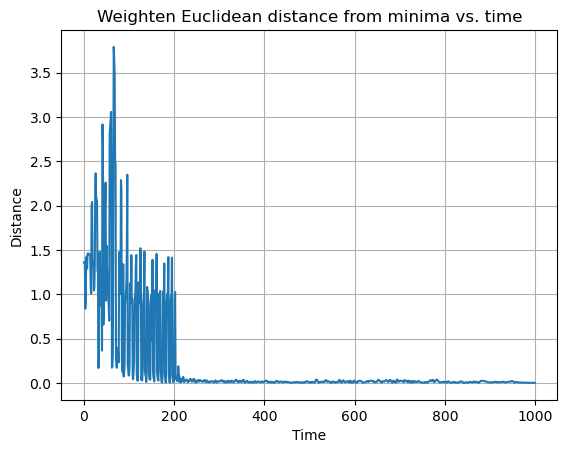

In [117]:
x_lin = np.zeros((1,1000))
for x in range(ite):
    x_lin[0,x] = x

# Plot
plt.plot(x_lin[0,:],dist[0,:])
plt.title(r'Weighten Euclidean distance from minima vs. time')
plt.xlabel('Time')
plt.ylabel(r'Distance')
plt.grid(True)
plt.savefig('Third_Rast_Dist.eps', format='eps')    
plt.show()

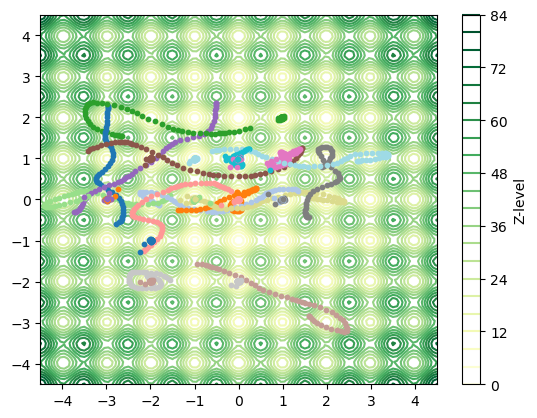

In [34]:
#Rastigin function and parameter space
XX = np.linspace(-4.5, 4.5, 100)     
YY = np.linspace(-4.5, 4.5, 100)     
XX, YY = np.meshgrid(XX, YY) 
Z = (XX**2 - 10 * np.cos(2 * np.pi * XX)) + \
    (YY**2 - 10 * np.cos(2 * np.pi * YY)) + 20

#Contour map 
fig, ax = plt.subplots()
#contour = ax.contour(XX, YY, Z, cmap=cm.nipy_spectral, levels=20)
contour = ax.contour(XX, YY, Z, cmap=cm.YlGn, levels=20)
contour_bar = plt.colorbar(contour, ax=ax, label='Z-level')

#Color map for particle iteration
norm = Normalize(vmin=0, vmax=ite - 1)
cmap = cm.cool 


colors = cm.tab20(np.linspace(0, 1, N))
#Plot particle in time sequence
for x in range(ite):
    """
    #if x > ite-5:
    #if x > ite-100:
    #if x == 0 or x == ite -1:
    #if x < 50:
    if x<30 or x>ite-50:
    #if x%50 == 0 or x<50 or x>ite-55:
        color = cmap(norm(x))
        plt.scatter(*X_save_4[:, x*N:(x+1)*N], s=10, color=[color], zorder=10)
    """
    #if x%30 == 0:
    if x%50 == 0 or x<50 or x>ite-55:
        for j in range(N):
            color = colors[j]
            plt.scatter(*X_save_4[:, x*N+j], s=10, color=color, zorder=10)
"""
#Color bar for particle iteration number
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # An empty array is needed for the colorbar
plt.colorbar(sm, label='Iteration')    
"""

#Download image as eps
plt.savefig('ThirdRast.eps', format='eps')    
plt.show()


In [27]:
results

array([[14., 53., 64., 69., 63.],
       [23., 46., 78., 70., 69.],
       [12., 54., 68., 71., 72.],
       [ 0., 16., 28., 77., 70.],
       [ 0., 27., 49., 78., 83.]])

In [37]:
# Generate LaTeX code for the table
latex_code = "\\begin{table}[htbp]\n"
latex_code += "\\centering\n"
latex_code += "\\begin{tabular}{|c|"
for i in range(len(results)):
    latex_code += "c|"
latex_code += "}\n"
latex_code += "\\hline\n"

# Add alpha values as the first row
latex_code += "$\\alpha$ & "
for i in range(len(results)):
    latex_code += f"${eta_start_array[i]}$ & "
latex_code = latex_code[:-2] + "\\\\\n"
latex_code += "\\hline\n"

# Add beta values as the first column and the table values
for i, row in enumerate(results):
    latex_code += f"${eta_growth_array[i]}$ & "
    for value in row:
        latex_code += f"{value/10:.1f} \%& "
    latex_code = latex_code[:-2] + "\\\\\n"
    latex_code += "\\hline\n"

latex_code += "\\end{tabular}\n"
latex_code += "\\caption{Your table caption here.}\n"
latex_code += "\\label{tab:my_table}\n"
latex_code += "\\end{table}\n"

print(latex_code)

\begin{table}[htbp]
\centering
\begin{tabular}{|c|c|c|c|c|c|}
\hline
$\alpha$ & $0.001$ & $0.01$ & $0.1$ & $1.0$ & $10.0$ \\
\hline
$0.25$ & 15.6 \%& 52.1 \%& 64.9 \%& 71.2 \%& 69.5 \%\\
\hline
$0.5$ & 15.4 \%& 46.5 \%& 66.7 \%& 68.6 \%& 67.0 \%\\
\hline
$1.0$ & 13.8 \%& 42.2 \%& 64.8 \%& 65.6 \%& 69.2 \%\\
\hline
$2.0$ & 0.0 \%& 13.4 \%& 28.7 \%& 70.6 \%& 69.4 \%\\
\hline
$5.0$ & 0.0 \%& 28.1 \%& 52.2 \%& 64.8 \%& 66.9 \%\\
\hline
\end{tabular}
\caption{Your table caption here.}
\label{tab:my_table}
\end{table}



### Third order - Ackley

In [118]:
#Initiate parameters
T = 10
h = 0.01
ite = 1000
A = 10
d = 2
N = 15
runs = 1
Shift = np.array([0,0])
X_save_4 = np.zeros((2,N*ite))
#Saves
results = np.zeros((5,5))
box = np.zeros((1,runs))
dist = np.zeros((1,ite))
F_4_save = np.zeros((runs,ite))

eta_growth = 2

F_4_s = np.zeros((runs,ite))
b_4_s = np.zeros((runs,ite))

#Tuning parameters
lambdaa = 1
gamma = 1
alpha = 1
eta_start = 0.001
eta_size = 100

lambdaa_array = np.array([0.01,0.1,1,3,10])
gamma_array = np.array([1,10,25,50,75,90])
beta_array = np.array([0.01,0.1,1,3,10])#np.array([1,10,100,1000,10000])
beta_func_array = np.array([750,800,850,900,950,1000])
eta_size_array = np.array([1,10,100,1000,10000])
eta_growth_array = np.array([0.25,0.5,1,2,5])
beta_growth_array = np.array([0.125,0.5,1,2,10])
eta_start_array = np.array([0.001,0.01,0.1,1,10])
for l in range(1):
    #alpha = beta_array[l]
    for j in range(1):
        #lambdaa = lambdaa_array[j]
        #alpha = beta_array[j]
        eta_growth = 0.25#eta_growth_array[j]
        #beta_growth = beta_growth_array[j]
        for k in range(1):
            #gamma = gamma_array[k]
            #beta_func = beta_func_array[k]
            #eta_size = eta_size_array[k]
            #lambdaa = lambdaa_array[k]
            #alpha = beta_array[k]
            eta_start = 1#eta_start_array[k]
            count_4 = 0
            for y in range(runs):
                #Random bounded particles and their velocity
                X = np.random.rand(d,N)
                lower_bound = -3
                upper_bound = 3
                X_4 = lower_bound + (upper_bound - lower_bound) * X   
                V_4 = np.zeros((d,N))
                F_4 = np.zeros((1,N))


                for x in range(ite):
                    beta = alpha#2 #-8/(950**int(alpha))*(x**int(alpha))
                    #beta = (eta_size)/ite**beta_growth*x**beta_growth+1
                    if x > 950:
                        beta = 1000000
                    #F_4 = (100)/ite**eta_growth*x**eta_growth+1 #eta_size/ite**eta_growth*x**eta_growth+1 
                    eta = eta_size/ite**eta_growth*x**eta_growth+eta_start 


                    #Covariance with noise
                    X_4_bar = 1/N*np.sum(X_4,axis=1)
                    Q_4 = X_4-X_4_bar[:,np.newaxis]
                    C_4 = 1/N*np.matmul(Q_4,Q_4.T)
                    C_4_sqrt = 1/np.sqrt(N)*Q_4


                    #gradf_4 = 2*(X_4-Shift[:,np.newaxis]) + 2*A*np.pi*np.sin(2*np.pi*(X_4-Shift[:,np.newaxis]))
                    pre = np.pi*np.exp((np.cos(2*np.pi*X_4[0,:])+np.cos(2*np.pi*X_4[1,:]))/2)*np.sin(2*np.pi*X_4)                
                    aff = 2**(3/2)*X_4*np.exp(-(np.sqrt(X_4[0,:]**2+X_4[1,:]**2)/(5*np.sqrt(2))))/(np.sqrt(X_4[0,:]**2+X_4[1,:]**2))
                    gradf_4 = pre + aff


                    xi_4 = np.random.normal(0,1,(N,N))

                    X_4 = X_4 + V_4*h
                    V_4 = V_4 - F_4*V_4*h - lambdaa*C_4@gradf_4*h + np.sqrt(2*gamma*lambdaa/beta)*C_4_sqrt@xi_4*h**(1/2)  
                    F_4 = F_4 + (np.linalg.norm(V_4,axis=0)-d/eta)*h
                    #F_4_save[y,x] = F_4[0,0]
                    X_save_4[:,x*N:(x+1)*N] = X_4
                    
                    a_4 = np.sum(np.exp(-20*Ackley(X_4)))
                    b_4 = np.sum(X_4*np.exp(-20*Ackley(X_4)),axis=1)
                    c_4 = b_4/a_4
                    dist[0,x] = np.linalg.norm(c_4)
                    
                a_4 = np.sum(np.exp(-20*Ackley(X_4)))
                b_4 = np.sum(X_4*np.exp(-20*Ackley(X_4)),axis=1)
                c_4 = b_4/a_4
                box[0,y] = np.linalg.norm(c_4)

                if np.linalg.norm(c_4)<0.1:
                    count_4 += 1
            #Saving the results
            results[j,k] = count_4
    print(results)

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


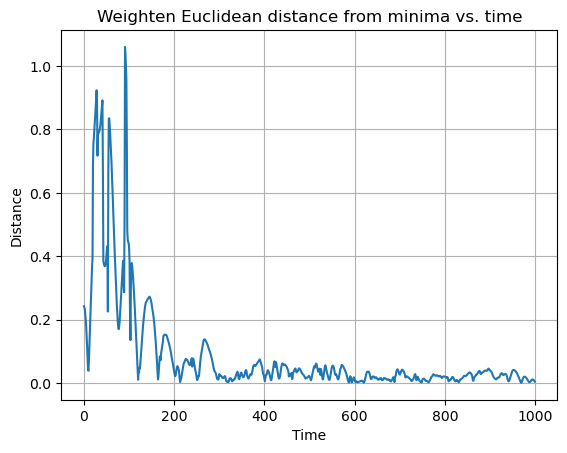

In [119]:
x_lin = np.zeros((1,1000))
for x in range(ite):
    x_lin[0,x] = x

# Plot
plt.plot(x_lin[0,:],dist[0,:])
plt.title(r'Weighten Euclidean distance from minima vs. time')
plt.xlabel('Time')
plt.ylabel(r'Distance')
plt.grid(True)
plt.savefig('Third_Ackley_Dist.eps', format='eps')    
plt.show()

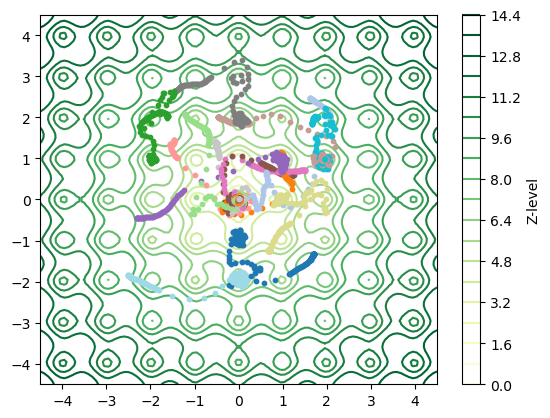

In [37]:
#Rastigin function and parameter space
XX = np.linspace(-4.5, 4.5, 100)     
YY = np.linspace(-4.5, 4.5, 100)     
XX, YY = np.meshgrid(XX, YY) 
Z = -20*np.exp(-0.2*np.sqrt(0.5*(XX**2+YY**2))) - np.exp(0.5*(np.cos(2*np.pi*XX)+np.cos(2*np.pi*YY))) + np.e + 20
#Contour map 
fig, ax = plt.subplots()
#contour = ax.contour(XX, YY, Z, cmap=cm.nipy_spectral, levels=20)
contour = ax.contour(XX, YY, Z, cmap=cm.YlGn, levels=20)
contour_bar = plt.colorbar(contour, ax=ax, label='Z-level')

#Color map for particle iteration
norm = Normalize(vmin=0, vmax=ite - 1)
cmap = cm.cool 


colors = cm.tab20(np.linspace(0, 1, N))
#Plot particle in time sequence
for x in range(ite):
    """
    #if x > ite-5:
    #if x > ite-100:
    #if x == 0 or x == ite -1:
    #if x < 50:
    if x<30 or x>ite-50:
    #if x%50 == 0 or x<50 or x>ite-55:
        color = cmap(norm(x))
        plt.scatter(*X_save_4[:, x*N:(x+1)*N], s=10, color=[color], zorder=10)
    """
    #if x%30 == 0:
    if x%10 == 0 or x<50 or x>ite-55:
        for j in range(N):
            color = colors[j]
            plt.scatter(*X_save_4[:, x*N+j], s=10, color=color, zorder=10)
"""
#Color bar for particle iteration number
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # An empty array is needed for the colorbar
plt.colorbar(sm, label='Iteration')    
"""

#Download image as eps
plt.savefig('ThirdAckley.eps', format='eps')    
plt.show()

In [41]:
# Generate LaTeX code for the table
latex_code = "\\begin{table}[htbp]\n"
latex_code += "\\centering\n"
latex_code += "\\begin{tabular}{|c|"
for i in range(len(results)):
    latex_code += "c|"
latex_code += "}\n"
latex_code += "\\hline\n"

# Add alpha values as the first row
latex_code += "$\\alpha$ & "
for i in range(len(results)):
    latex_code += f"${eta_start_array[i]}$ & "
latex_code = latex_code[:-2] + "\\\\\n"
latex_code += "\\hline\n"

# Add beta values as the first column and the table values
for i, row in enumerate(results):
    latex_code += f"${eta_growth_array[i]}$ & "
    for value in row:
        latex_code += f"{value/10:.1f} \%& "
    latex_code = latex_code[:-2] + "\\\\\n"
    latex_code += "\\hline\n"

latex_code += "\\end{tabular}\n"
latex_code += "\\caption{Your table caption here.}\n"
latex_code += "\\label{tab:my_table}\n"
latex_code += "\\end{table}\n"

print(latex_code)

\begin{table}[htbp]
\centering
\begin{tabular}{|c|c|c|c|c|c|}
\hline
$\alpha$ & $0.001$ & $0.01$ & $0.1$ & $1.0$ & $10.0$ \\
\hline
$0.25$ & 0.0 \%& 100.0 \%& 100.0 \%& 100.0 \%& 100.0 \%\\
\hline
$0.5$ & 0.0 \%& 99.8 \%& 100.0 \%& 100.0 \%& 100.0 \%\\
\hline
$1.0$ & 0.0 \%& 99.1 \%& 100.0 \%& 100.0 \%& 100.0 \%\\
\hline
$2.0$ & 0.0 \%& 0.0 \%& 87.4 \%& 100.0 \%& 100.0 \%\\
\hline
$5.0$ & 0.0 \%& 0.0 \%& 0.6 \%& 100.0 \%& 100.0 \%\\
\hline
\end{tabular}
\caption{Your table caption here.}
\label{tab:my_table}
\end{table}



In [100]:
X_4

array([[-9.92752736e-01, -9.89181679e-01, -1.99473562e+00,
         9.92687686e-01,  2.97944265e+00,  2.97294927e+00,
         3.97896066e+00,  3.97902538e+00, -4.98313457e+00,
        -1.98212627e+00,  2.73572716e-03,  5.99227376e+00,
        -2.10208748e-05, -4.97992607e+00,  9.68549298e-01],
       [-3.97090854e+00, -2.96729266e+00,  6.98177619e+00,
        -3.97093119e+00,  2.97931924e+00,  1.98210895e+00,
        -2.98419541e+00, -2.98418965e+00,  3.98656634e+00,
         2.97316130e+00, -2.99838150e-03,  7.98969141e+00,
         5.97716860e+00,  2.98802274e+00, -9.68455756e-01]])

In [101]:
Ackley(X_4)

array([8.81315178e+00, 7.18095170e+00, 1.28471782e+01, 8.81315195e+00,
       9.00109495e+00, 7.96171223e+00, 1.01203508e+01, 1.01203510e+01,
       1.19012567e+01, 7.96171129e+00, 1.19188836e-02, 1.51332462e+01,
       1.14253488e+01, 1.12175495e+01, 3.57445202e+00])

### BoxPlot

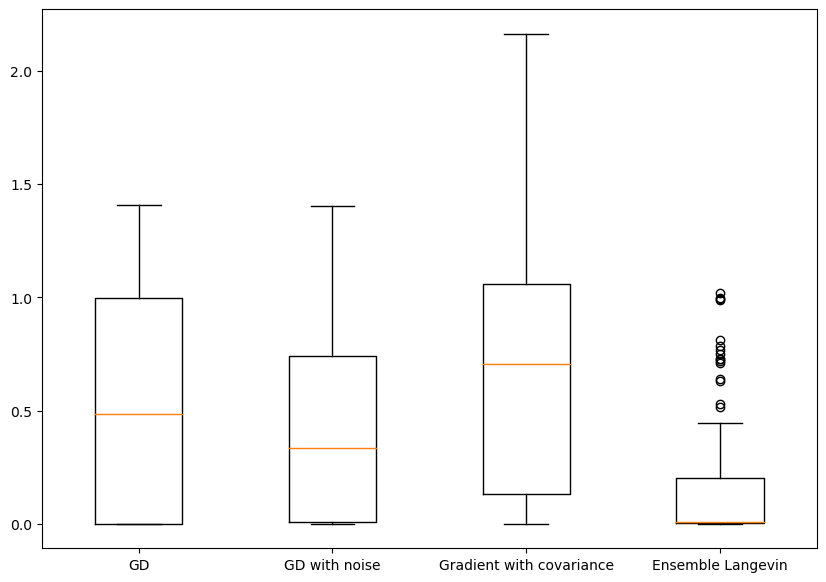

In [47]:
import matplotlib.pyplot as plt
import numpy as np
  
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot([box_1[0,:], box_2[0,:], box_3[0,:], box_4[0,:]], positions=[1, 2, 3, 4])
# show plot
plt.xticks([1, 2, 3, 4], ['GD', 'GD with noise', 'Gradient with covariance', 'Ensemble Langevin'])
plt.savefig('Box_Plot_First_Order.eps', format='eps')   
plt.show()

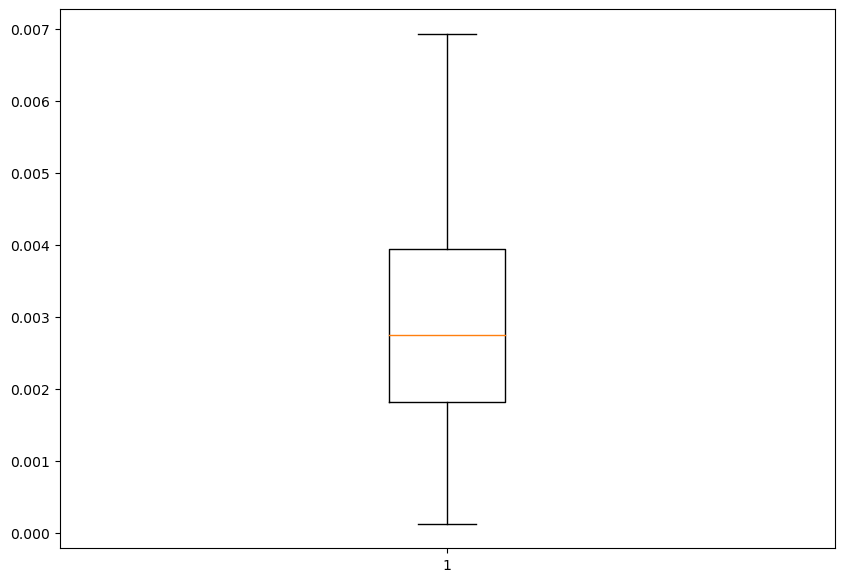

In [58]:
import matplotlib.pyplot as plt
import numpy as np
  
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot([box[0,:]], positions=[1])
# show plot
plt.savefig('Box_Plot_Third_Order_Ackley.eps', format='eps')   
plt.show()

### Change in h

In [57]:
import numpy as np

#Initiate parameters
T = 10
h = 0.01
ite = 1000
A = 10
d = 2
N = 15
runs = 1000
#Random bounded particles


#Particle position for visualization
box_1 = np.zeros((1,runs))
box_2 = np.zeros((1,runs))
box_3 = np.zeros((1,runs))
box_4 = np.zeros((1,runs))

"""
dist_1 = np.zeros((1,ite))
dist_2 = np.zeros((1,ite))
dist_3 = np.zeros((1,ite))
dist_4 = np.zeros((1,ite))
"""

"""
X_save_1 = np.zeros((2,N*ite))
X_save_2 = np.zeros((2,N*ite))
X_save_3 = np.zeros((2,N*ite))
X_save_4 = np.zeros((2,N*ite))
"""
results = np.zeros((4,4))
h_array = np.array([0.0005, 0.001, 0.0015, 0.003])
for j in range(4):
    T = 1.5 #Time
    h = h_array[j] #Time-step
    ite = int(T/h) #Iterations

    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    #while any(np.linalg.norm(X,axis=0)>0.1):
    for y in range(runs):

        X = np.random.rand(d,N)
        lower_bound = -3
        upper_bound = 3
        X = lower_bound + (upper_bound - lower_bound) * X

        X_1 = X
        X_2 = X
        X_3 = X
        X_4 = X
        for x in range(ite):
            beta = 0.015
            beta2 = 0.2
            if (x > ite-50):
                beta = 15400
                beta2 = 15400

            #Gradient descent without noise
            gradf_1 = 2*X_1 + 2*A*np.pi*np.sin(2*np.pi*X_1)

            X_1 = X_1 - gradf_1*h #+ np.sqrt(2/beta)*C_sqrt@xi*h**(1/2)

            #Gradient descent with noise
            gradf_2 = 2*X_2 + 2*A*np.pi*np.sin(2*np.pi*X_2)
            xi_2 = np.random.normal(0,1,(d,N))

            X_2 = X_2 - gradf_2*h + np.sqrt(2/beta2)*xi_2*h**(1/2)

            #Covariance without noise
            X_3_bar = 1/N*np.sum(X_3,axis=1)
            Q_3 = X_3-X_3_bar[:,np.newaxis]
            C_3 = 1/N*np.matmul(Q_3,Q_3.T)
            gradf_3 = 2*X_3 + 2*A*np.pi*np.sin(2*np.pi*X_3)

            X_3 = X_3 - C_3@gradf_3*h

            #Covariance with noise
            X_4_bar = 1/N*np.sum(X_4,axis=1)
            Q_4 = X_4-X_4_bar[:,np.newaxis]
            C_4 = 1/N*np.matmul(Q_4,Q_4.T)
            C_4_sqrt = 1/np.sqrt(N)*Q_4
            gradf_4 = 2*X_4 + 2*A*np.pi*np.sin(2*np.pi*X_4)
            xi_4 = np.random.normal(0,1,(N,N))
            xi_4 = np.random.normal(0,1,(d,N))

            X_4 = X_4 - C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt*xi_4*h**(1/2) #replace 0.01 with h

            #X_save[:,x*N:(x+1)*N] = X
            """
            X_save_1[:,x*N:(x+1)*N] = X_1
            X_save_2[:,x*N:(x+1)*N] = X_2
            X_save_3[:,x*N:(x+1)*N] = X_3
            X_save_4[:,x*N:(x+1)*N] = X_4
            """
            """
            a_1 = np.sum(np.exp(-20*Rast(X_1,A)))
            b_1 = np.sum(X_1*np.exp(-20*Rast(X_1,A)),axis=1)
            c_1=b_1/a_1
            
            a_2 = np.sum(np.exp(-20*Rast(X_2,A)))
            b_2 = np.sum(X_2*np.exp(-20*Rast(X_2,A)),axis=1)
            c_2=b_2/a_2

            a_3 = np.sum(np.exp(-20*Rast(X_3,A)))
            b_3 = np.sum(X_3*np.exp(-20*Rast(X_3,A)),axis=1)
            c_3=b_3/a_3

            a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
            b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
            c_4=b_4/a_4
            
            dist_1[0,x] = np.linalg.norm(c_1)
            dist_2[0,x] = np.linalg.norm(c_2)
            dist_3[0,x] = np.linalg.norm(c_3)
            dist_4[0,x] = np.linalg.norm(c_4)
            """
            
        a_1 = np.sum(np.exp(-20*Rast(X_1,A)))
        b_1 = np.sum(X_1*np.exp(-20*Rast(X_1,A)),axis=1)
        c_1=b_1/a_1
        
        a_2 = np.sum(np.exp(-20*Rast(X_2,A)))
        b_2 = np.sum(X_2*np.exp(-20*Rast(X_2,A)),axis=1)
        c_2=b_2/a_2
        
        a_3 = np.sum(np.exp(-20*Rast(X_3,A)))
        b_3 = np.sum(X_3*np.exp(-20*Rast(X_3,A)),axis=1)
        c_3=b_3/a_3
        
        a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
        b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
        c_4=b_4/a_4
        
        if j == 0:
            box_1[0,y] = np.linalg.norm(c_4)
        if j == 1:
            box_2[0,y] = np.linalg.norm(c_4)
        if j == 2:
            box_3[0,y] = np.linalg.norm(c_4)
        if j == 3:
            box_4[0,y] = np.linalg.norm(c_4)
        
        
        if np.linalg.norm(c_1)<0.1:
            count_1 +=1

        if np.linalg.norm(c_2)<0.1:
            count_2 +=1

        if np.linalg.norm(c_3)<0.1:
            count_3 +=1

        if np.linalg.norm(c_4)<0.1:
            count_4 +=1
    results[0,j] = count_1
    results[1,j] = count_2
    results[2,j] = count_3
    results[3,j] = count_4
results

C:\Users\gveva\AppData\Local\Temp\ipykernel_13324\4102449214.py:85: RuntimeWarning: overflow encountered in matmul
  C_4 = 1/N*np.matmul(Q_4,Q_4.T)
C:\Users\gveva\AppData\Local\Temp\ipykernel_13324\4102449214.py:91: RuntimeWarning: invalid value encountered in matmul
  X_4 = X_4 - C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt*xi_4*h**(1/2) #replace 0.01 with h
C:\Users\gveva\AppData\Local\Temp\ipykernel_13324\4102449214.py:87: RuntimeWarning: invalid value encountered in sin
  gradf_4 = 2*X_4 + 2*A*np.pi*np.sin(2*np.pi*X_4)
C:\Users\gveva\AppData\Local\Temp\ipykernel_13324\4102449214.py:77: RuntimeWarning: overflow encountered in matmul
  C_3 = 1/N*np.matmul(Q_3,Q_3.T)
C:\Users\gveva\AppData\Local\Temp\ipykernel_13324\4102449214.py:80: RuntimeWarning: invalid value encountered in matmul
  X_3 = X_3 - C_3@gradf_3*h
C:\Users\gveva\AppData\Local\Temp\ipykernel_13324\4102449214.py:78: RuntimeWarning: invalid value encountered in sin
  gradf_3 = 2*X_3 + 2*A*np.pi*np.sin(2*np.pi*X_3)
C:\Users\gve

array([[401., 403., 413., 383.],
       [633., 611., 613., 579.],
       [401., 393., 250.,  57.],
       [817., 839., 803., 113.]])

In [59]:
print(r"\begin{table}[]")
print(r"\begin{tabular}{l|llll}")
print(r"\backslashbox{Method}{$\alpha$}                                               & " + " & ".join([str(val) for val in h_array]) + r" \\ \hline")
for i, row in enumerate(results):
    method = ['Gradient descent &', 'Gradient descent with Brownian noise &', 'Ensemble Langevin dynamics &', 'Ensemble Langevin&'][i]
    formatted_row = [f"{value/10:.1f}\%" for value in row]  # Convert each value to percentage
    print(f"{method:50}", end="")
    print(" & ".join(formatted_row), end=" \\\\\n")
print(r"\end{tabular}")
print(r"\end{table}")

\begin{table}[]
\begin{tabular}{l|llll}
\backslashbox{Method}{$\alpha$}                                               & 0.0005 & 0.001 & 0.0015 & 0.003 \\ \hline
Gradient descent &                                40.1\% & 40.3\% & 41.3\% & 38.3\% \\
Gradient descent with Brownian noise &            63.3\% & 61.1\% & 61.3\% & 57.9\% \\
Ensemble Langevin dynamics &                      40.1\% & 39.3\% & 25.0\% & 5.7\% \\
Ensemble Langevin&                                81.7\% & 83.9\% & 80.3\% & 11.3\% \\
\end{tabular}
\end{table}


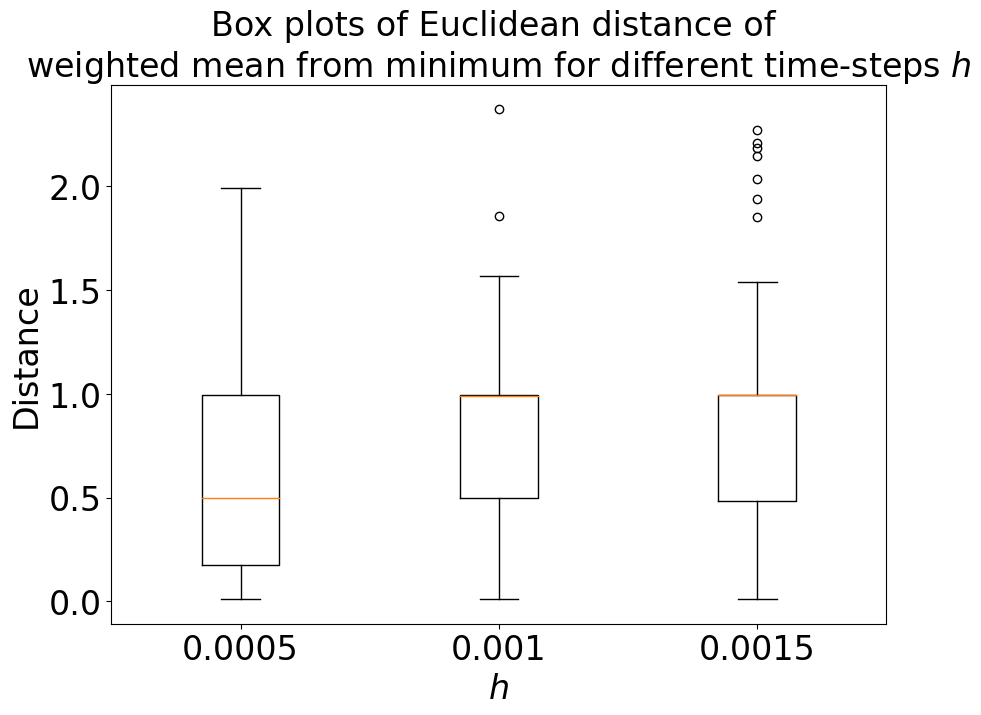

In [68]:
import matplotlib.pyplot as plt
import numpy as np
  
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot([box_1[box_1>=0.01], box_2[box_2>=0.01], box_3[box_3>=0.01]], positions=[1, 2, 3])
# show plot
plt.xticks([1, 2, 3], ['0.0005', '0.001', '0.0015'],fontsize=24)
plt.yticks(fontsize =24)
plt.title('Box plots of Euclidean distance of \nweighted mean from minimum for different time-steps $h$',fontsize=24)
plt.xlabel(r'$h$',fontsize=24)
plt.ylabel(r'Distance',fontsize=24)
plt.savefig('Box_Plot_h.eps', format='eps') 
plt.show()

### Change in t

In [72]:
import numpy as np

#Initiate parameters
T = 10
h = 0.01
ite = 1000
A = 10
d = 2
N = 15
runs = 100
#Random bounded particles


#Particle position for visualization
box_1 = np.zeros((1,runs))
box_2 = np.zeros((1,runs))
box_3 = np.zeros((1,runs))
box_4 = np.zeros((1,runs))

"""
dist_1 = np.zeros((1,ite))
dist_2 = np.zeros((1,ite))
dist_3 = np.zeros((1,ite))
dist_4 = np.zeros((1,ite))
"""

"""
X_save_1 = np.zeros((2,N*ite))
X_save_2 = np.zeros((2,N*ite))
X_save_3 = np.zeros((2,N*ite))
X_save_4 = np.zeros((2,N*ite))
"""
results = np.zeros((4,4))
T_array = np.array([0.25, 1.5, 5, 10])
for j in range(4):
    T = T_array[j] #Time
    h = 0.0015 #Time-step
    ite = int(T/h) #Iterations

    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    #while any(np.linalg.norm(X,axis=0)>0.1):
    for y in range(runs):

        X = np.random.rand(d,N)
        lower_bound = -3
        upper_bound = 3
        X = lower_bound + (upper_bound - lower_bound) * X

        X_1 = X
        X_2 = X
        X_3 = X
        X_4 = X
        for x in range(ite):
            beta = 0.015
            beta2 = 0.2
            if (x > 0.9*ite):#-50):
                beta = 15400
                beta2 = 15400

            #Gradient descent without noise
            gradf_1 = 2*X_1 + 2*A*np.pi*np.sin(2*np.pi*X_1)

            X_1 = X_1 - gradf_1*h #+ np.sqrt(2/beta)*C_sqrt@xi*h**(1/2)

            #Gradient descent with noise
            gradf_2 = 2*X_2 + 2*A*np.pi*np.sin(2*np.pi*X_2)
            xi_2 = np.random.normal(0,1,(d,N))

            X_2 = X_2 - gradf_2*h + np.sqrt(2/beta2)*xi_2*h**(1/2)

            #Covariance without noise
            X_3_bar = 1/N*np.sum(X_3,axis=1)
            Q_3 = X_3-X_3_bar[:,np.newaxis]
            C_3 = 1/N*np.matmul(Q_3,Q_3.T)
            gradf_3 = 2*X_3 + 2*A*np.pi*np.sin(2*np.pi*X_3)

            X_3 = X_3 - C_3@gradf_3*h

            #Covariance with noise
            X_4_bar = 1/N*np.sum(X_4,axis=1)
            Q_4 = X_4-X_4_bar[:,np.newaxis]
            C_4 = 1/N*np.matmul(Q_4,Q_4.T)
            C_4_sqrt = 1/np.sqrt(N)*Q_4
            gradf_4 = 2*X_4 + 2*A*np.pi*np.sin(2*np.pi*X_4)
            xi_4 = np.random.normal(0,1,(N,N))
            xi_4 = np.random.normal(0,1,(d,N))

            X_4 = X_4 - C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt*xi_4*h**(1/2) #replace 0.01 with h

            #X_save[:,x*N:(x+1)*N] = X
            """
            X_save_1[:,x*N:(x+1)*N] = X_1
            X_save_2[:,x*N:(x+1)*N] = X_2
            X_save_3[:,x*N:(x+1)*N] = X_3
            X_save_4[:,x*N:(x+1)*N] = X_4
            """
            """
            a_1 = np.sum(np.exp(-20*Rast(X_1,A)))
            b_1 = np.sum(X_1*np.exp(-20*Rast(X_1,A)),axis=1)
            c_1=b_1/a_1
            
            a_2 = np.sum(np.exp(-20*Rast(X_2,A)))
            b_2 = np.sum(X_2*np.exp(-20*Rast(X_2,A)),axis=1)
            c_2=b_2/a_2

            a_3 = np.sum(np.exp(-20*Rast(X_3,A)))
            b_3 = np.sum(X_3*np.exp(-20*Rast(X_3,A)),axis=1)
            c_3=b_3/a_3

            a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
            b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
            c_4=b_4/a_4
            
            dist_1[0,x] = np.linalg.norm(c_1)
            dist_2[0,x] = np.linalg.norm(c_2)
            dist_3[0,x] = np.linalg.norm(c_3)
            dist_4[0,x] = np.linalg.norm(c_4)
            """
            
        a_1 = np.sum(np.exp(-20*Rast(X_1,A)))
        b_1 = np.sum(X_1*np.exp(-20*Rast(X_1,A)),axis=1)
        c_1=b_1/a_1
        
        a_2 = np.sum(np.exp(-20*Rast(X_2,A)))
        b_2 = np.sum(X_2*np.exp(-20*Rast(X_2,A)),axis=1)
        c_2=b_2/a_2
        
        a_3 = np.sum(np.exp(-20*Rast(X_3,A)))
        b_3 = np.sum(X_3*np.exp(-20*Rast(X_3,A)),axis=1)
        c_3=b_3/a_3
        
        a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
        b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
        c_4=b_4/a_4
        
        """
        if j == 0:
            box_1[0,y] = np.linalg.norm(c_4)
        if j == 1:
            box_2[0,y] = np.linalg.norm(c_4)
        if j == 2:
            box_3[0,y] = np.linalg.norm(c_4)
        if j == 3:
            box_4[0,y] = np.linalg.norm(c_4)
        """
        
    
        box_1[0,y] = np.linalg.norm(c_1)
        box_2[0,y] = np.linalg.norm(c_2)
        box_3[0,y] = np.linalg.norm(c_3)
        box_4[0,y] = np.linalg.norm(c_4)

        if np.linalg.norm(c_1)<0.1:
            count_1 +=1

        if np.linalg.norm(c_2)<0.1:
            count_2 +=1

        if np.linalg.norm(c_3)<0.1:
            count_3 +=1

        if np.linalg.norm(c_4)<0.1:
            count_4 +=1
    results[0,j] = count_1
    results[1,j] = count_2
    results[2,j] = count_3
    results[3,j] = count_4
results

array([[52., 39., 42., 33.],
       [54., 56., 62., 66.],
       [39., 17., 27., 27.],
       [62., 87., 71., 67.]])

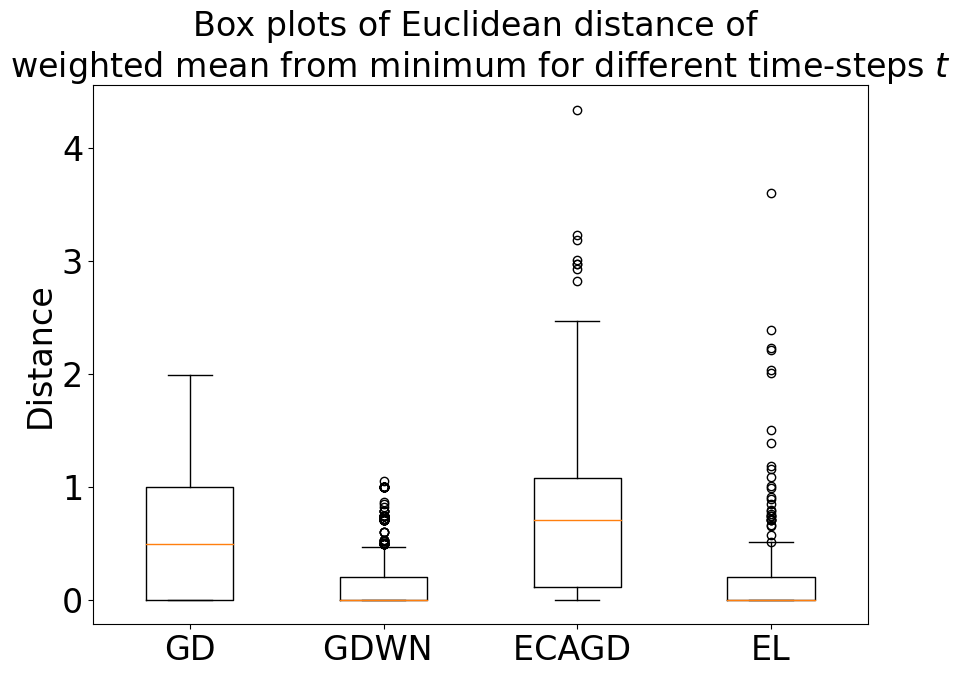

In [57]:
import matplotlib.pyplot as plt
import numpy as np
  
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot([box_1[0,:], box_2[0,:], box_3[0,:], arr_cleaned], positions=[1, 2, 3, 4])
# show plot
plt.xticks([1, 2, 3, 4], ['GD', 'GDWN ', 'ECAGD ', 'EL'],fontsize=24)
plt.yticks(fontsize =24)
plt.title('Box plots of Euclidean distance of \nweighted mean from minimum for different time-steps $t$',fontsize=24)
plt.ylabel(r'Distance',fontsize=24)
plt.savefig('Box_Plot_t.eps', format='eps') 
plt.show()

In [70]:
print(r"\begin{table}[]")
print(r"\begin{tabular}{l|llll}")
print(r"\backslashbox{Method}{$T$-value}                                               & " + " & ".join([str(val) for val in T_array]) + r" \\ \hline")
for i, row in enumerate(results):
    method = ['Gradient descent &', 'Gradient descent with Brownian noise &', 'Ensemble Langevin dynamics &', 'Ensemble Langevin&'][i]
    formatted_row = [f"{value/10:.1f}\%" for value in row]  # Convert each value to percentage
    print(f"{method:50}", end="")
    print(" & ".join(formatted_row), end=" \\\\\n")
print(r"\end{tabular}")
print(r"\end{table}")

\begin{table}[]
\begin{tabular}{l|llll}
\backslashbox{Method}{$T$-value}                                               & 0.25 & 1.5 & 5.0 & 10.0 \\ \hline
Gradient descent &                                41.5\% & 39.4\% & 38.5\% & 39.9\% \\
Gradient descent with Brownian noise &            44.7\% & 61.9\% & 64.6\% & 65.8\% \\
Ensemble Langevin dynamics &                      24.7\% & 24.0\% & 22.2\% & 24.0\% \\
Ensemble Langevin&                                64.9\% & 84.3\% & 71.5\% & 64.2\% \\
\end{tabular}
\end{table}


### Attractive-repulsive dynamics based optimization

In [35]:
#Initiate parameters
T = 10
h = 0.01
ite = int(T/h)
A = 10
d = 2
N = 15
runs = 100

#Random bounded particles
X_4_arr = np.random.rand(d,N,runs)
lower_bound = -3
upper_bound = 3
X_4_arr2 = lower_bound + (upper_bound - lower_bound) * X_4_arr  

X_contour = np.zeros((d,N*int(T/h)))

#Changing parameters
alpha = 0#0.01 #Lambdaa
alpha2 = 5.1 #Sigma
eta = 1
results = np.zeros((5,5))

h_array = np.array([0.00015,0.0015,0.015,0.15,1.5])
T_array = np.array([0.15,1.5,15,150,1500])
alpha_array = np.array([0,0.0001,0.001,0.01,0.1])
alpha2_array = np.array([0.5,0.3,0.1,0.05,0.01])

for j in range(1):
    #h = h_array[j]
    #T = T_array[j]
    #ite = int(T/h)
    #alpha2 = alpha2_array[j]
    for k in range(4):
        alpha = alpha_array[k]
        count = 0
        for y in range(runs):

            X = X_4_arr2[:,:,y]
            X_t = X
            for x in range(ite):
                lambdaa = alpha
                sigma = alpha2
                if (x > int(ite*0.9)):
                    lambdaa = 0
                    sigma = 0



                #First term
                numer = np.sum(X*np.exp(-20*Rast(X,A)),axis=1)
                denom = np.sum(np.exp(-20*Rast(X,A)))
                X_mean =numer/denom

                first = X - X_mean[:,np.newaxis]

                #Second term

                N_X = X[0,:] 
                N_Y = X[1,:]

                N_X_diff = N_X - N_X[:,np.newaxis]
                N_Y_diff = N_Y - N_Y[:,np.newaxis]

                exponent = np.exp(-1/2*(N_X_diff**2+N_Y_diff**2))
                sums_X = np.sum(N_X_diff*exponent,axis=0)
                sums_Y = np.sum(N_Y_diff*exponent,axis=0)
                second = np.array([sums_X,sums_Y])

                xi = np.random.normal(0,1,(d,N))
                third = first*xi
                X_contour[:,x*N:(x+1)*N] = X
                X = X - eta*first*h  + lambdaa/N*second*h + sigma*third*h**(1/2)
                #X_4 = X_4 - lambdaa*C_4@gradf_4*h + np.sqrt(2/beta)*C_4_sqrt@xi_4*h**(1/2)


            a_4 = np.sum(np.exp(-20*Rast(X,A)))
            b_4 = np.sum(X*np.exp(-20*Rast(X,A)),axis=1)
            c_4=b_4/a_4

            if np.all(abs(c_4-np.array([0,0]))<0.20):
                count +=1


        results[k,j] = count
results

array([[74.,  0.,  0.,  0.,  0.],
       [72.,  0.,  0.,  0.,  0.],
       [77.,  0.,  0.,  0.,  0.],
       [72.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [24]:
first = np.array([[1,2,3],[4,5,6]])

xi = np.random.normal(0,1,(2,3))
third = first*xi

print(first)

print(xi)

print(third)

[[1 2 3]
 [4 5 6]]
[[-0.11873718 -0.20460521  0.61447658]
 [-0.19096952  0.17686746 -0.43063911]]
[[-0.11873718 -0.40921042  1.84342975]
 [-0.76387809  0.8843373  -2.58383464]]


In [32]:
print(xi*6)

[[-0.71242306 -1.22763127  3.68685949]
 [-1.14581713  1.06120476 -2.58383464]]


In [118]:
arr = results
#gamma_array = np.array([0,0.1,0.3,0.5]) #down
#gamma2_array = np.array([1,0.9,0.7,0.5]) #right
# Generate LaTeX code for the table
latex_code = "\\begin{table}[htbp]\n"
latex_code += "\\caption{Your table caption here.}\n"
latex_code += "\\centering\n"
latex_code += "\\begin{tabular}{|c|"
for i in range(len(arr)):
    latex_code += "c|"
latex_code += "}\n"
latex_code += "\\hline\n"

# Add alpha values as the first row
latex_code += "$\\alpha$ & "
for i in range(len(arr)):
    latex_code += f"${h_array[i]}$ & "
latex_code = latex_code[:-2] + "\\\\\n"
latex_code += "\\hline\n"

# Add beta values as the first column and the table values
for i, row in enumerate(arr):
    latex_code += f"${alpha_array[i]}$ & "
    for value in row:
        latex_code += f"{value:.1f} \%& "
    latex_code = latex_code[:-2] + "\\\\\n"
    latex_code += "\\hline\n"

latex_code += "\\end{tabular}\n"

latex_code += "\\label{tab:my_table}\n"
latex_code += "\\end{table}\n"
print(latex_code)

\begin{table}[htbp]
\caption{Your table caption here.}
\centering
\begin{tabular}{|c|c|c|c|c|c|}
\hline
$\alpha$ & $0.00015$ & $0.0015$ & $0.015$ & $0.15$ & $1.5$ \\
\hline
$0.0$ & 8.0 \%& 36.0 \%& 52.0 \%& 47.0 \%& 13.0 \%\\
\hline
$0.0001$ & 7.0 \%& 43.0 \%& 57.0 \%& 52.0 \%& 10.0 \%\\
\hline
$0.001$ & 11.0 \%& 37.0 \%& 63.0 \%& 46.0 \%& 7.0 \%\\
\hline
$0.01$ & 3.0 \%& 43.0 \%& 57.0 \%& 49.0 \%& 10.0 \%\\
\hline
$0.1$ & 8.0 \%& 34.0 \%& 62.0 \%& 51.0 \%& 7.0 \%\\
\hline
\end{tabular}
\label{tab:my_table}
\end{table}



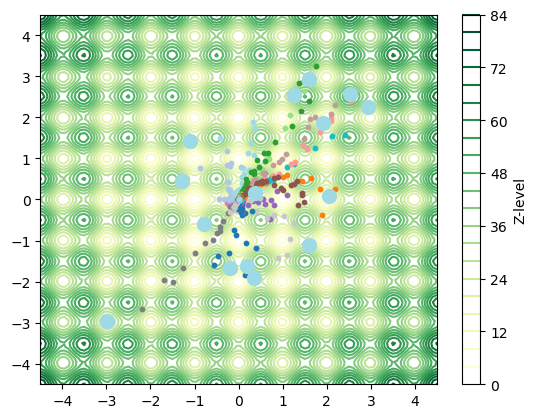

In [109]:
#Rastigin function and parameter space
XX = np.linspace(-4.5, 4.5, 100)     
YY = np.linspace(-4.5, 4.5, 100)     
XX, YY = np.meshgrid(XX, YY) 
Z = (XX**2 - 10 * np.cos(2 * np.pi * XX)) + \
    (YY**2 - 10 * np.cos(2 * np.pi * YY)) + 20

#Contour map 
fig, ax = plt.subplots()
#contour = ax.contour(XX, YY, Z, cmap=cm.nipy_spectral, levels=20)
contour = ax.contour(XX, YY, Z, cmap=cm.YlGn, levels=20)
contour_bar = plt.colorbar(contour, ax=ax, label='Z-level')

#Color map for particle iteration
norm = Normalize(vmin=0, vmax=ite - 1)
cmap = cm.cool 


colors = cm.tab20(np.linspace(0, 1, N))
#Plot particle in time sequence

for x in range(ite):
    if x%50 == 0 or x<50 or x>ite-55:
    #if x<30:
    #if x>ite-55:
        for j in range(N):
            color = colors[j]
            plt.scatter(*X_contour[:, x*N+j], s=10, color=color, zorder=10)

plt.scatter(*X_t, s=100, color=color, zorder=10)
#Download image as eps
#plt.savefig('FirstHimmelContour.eps', format='eps')    
plt.show()

In [101]:
X_t

array([[ 1.46572089, -1.85341428, -0.69147186,  2.91988497, -2.60242226,
         2.68533905,  1.95114766,  2.04609136, -0.26934271,  2.99915623,
        -0.00499526, -1.03198375, -0.093528  ,  1.221353  , -2.76089871],
       [ 1.27819904, -1.26392326,  2.41079196, -1.99507668, -1.19342718,
         2.87412287, -2.3655705 , -0.66399196, -1.31362354, -1.47530191,
        -1.93473478,  0.31378091,  0.61616683,  0.1292339 , -2.26658439]])

In [47]:
N_X = np.array([1,2,3])
N_Y = np.array([4,5,6])


            
N_X_diff = N_X - N_X[:,np.newaxis]
N_Y_diff = N_Y - N_Y[:,np.newaxis]

exponent = np.exp(-1/2*(N_X_diff**2+N_Y_diff**2))
sums_X = np.sum(N_X_diff*exponent,axis=0)
sums_Y = np.sum(N_Y_diff*exponent,axis=0)
second = np.array([sums_X,sums_Y])



In [51]:
np.exp(-1/2*((1-3)**2+(4-6)**2))*(1-3)

-0.03663127777746836

In [52]:
print(N_X)
print("Separator")
print(N_X_diff)
print("Separator")
print(exponent)
print("Exp^")
print((N_X_diff*exponent))
print("Separator^")
print(sums_X)
print("sums^")
print(second.shape)

[1 2 3]
Separator
[[ 0  1  2]
 [-1  0  1]
 [-2 -1  0]]
Separator
[[1.         0.36787944 0.01831564]
 [0.36787944 1.         0.36787944]
 [0.01831564 0.36787944 1.        ]]
Exp^
[[ 0.          0.36787944  0.03663128]
 [-0.36787944  0.          0.36787944]
 [-0.03663128 -0.36787944  0.        ]]
Separator^
[-0.40451072  0.          0.40451072]
sums^
(2, 3)


In [63]:
np.sum(N_X_diff,axis=0)

array([-10,  -5,   0,   5,  10])

In [61]:
N_X_diff

array([[ 0,  1,  2,  3,  4],
       [-1,  0,  1,  2,  3],
       [-2, -1,  0,  1,  2],
       [-3, -2, -1,  0,  1],
       [-4, -3, -2, -1,  0]])